# **Creating Cohorts of Songs**
### **Introduction**

In today's digital landscape, personalized recommendations have become a cornerstone of user engagement, particularly in the entertainment industry. Streaming platforms such as Spotify leverage machine learning to analyze user preferences and enhance content discovery. With over 456 million active users, including 195 million paid subscribers, Spotify continuously refines its recommendation algorithms to deliver a more uniquely tailored listening experience.

This project focuses on the clustering of songs based on various musical attributes to create meaningful cohorts. By performing exploratory data analysis (EDA) and applying clustering techniques, we aim to uncover patterns in Spotify's dataset of Rolling Stones albums. Understanding these patterns will help in grouping similar songs together, ultimately improving recommendation systems. The insights gained from this analysis could contribute to more intuitive and engaging music recommendations, benefiting both users and streaming platforms alike.

## **1. Data Inspection and Cleaning**
First, we'll examine the data to identify duplicates, missing values, irrelevant entries, and outliers. We'll also check for instances of erroneous entries and correct them as needed.

In [1]:
# Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning & Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

# 1.1 Load the dataset
# Assuming the dataset is available as a CSV file named 'rolling_stones_spotify.csv'
df = pd.read_csv('../data/rolling_stones_spotify.csv')

# Display first five rows
print("\nFirst 5 rows of the dataset:")
df.head()

/Users/rakeshbhatia/opt/miniforge3/envs/creating_cohorts_of_songs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



First 5 rows of the dataset:


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.082,0.463,0.993,0.996,0.932,-12.913,0.110,118.001,0.030,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.437,0.326,0.965,0.233,0.961,-4.803,0.076,131.455,0.318,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.416,0.386,0.969,0.400,0.956,-4.936,0.115,130.066,0.313,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.567,0.369,0.985,0.000,0.895,-5.535,0.193,132.994,0.147,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.400,0.303,0.969,0.056,0.966,-5.098,0.093,130.533,0.206,32,305106


## **1.1 Initial Data Inspection**

In [2]:
# Initial data inspection
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nData types of each column:")
print(df.dtypes)

print("\nBasic statistics of numerical columns:")
print(df.describe())

Dataset shape: (1610, 18)

First 5 rows of the dataset:
   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8Yn

We can see that all the audio features are standardized on a scale from 0 to 1, except for loudness (which is measured in dB). We'll normalize loudness to the same scale later on.

## **1.2 Check For Missing Values**


Missing values in each column:
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

Percentage of missing values in each column:
Unnamed: 0         0.000
name               0.000
album              0.000
release_date       0.000
track_number       0.000
id                 0.000
uri                0.000
acousticness       0.000
danceability       0.000
energy             0.000
instrumentalness   0.000
liveness           0.000
loudness           0.000
speechiness        0.000
tempo              0.000
valence            0.000
popularity         0.000
duration_ms        0.000
dtype: float64


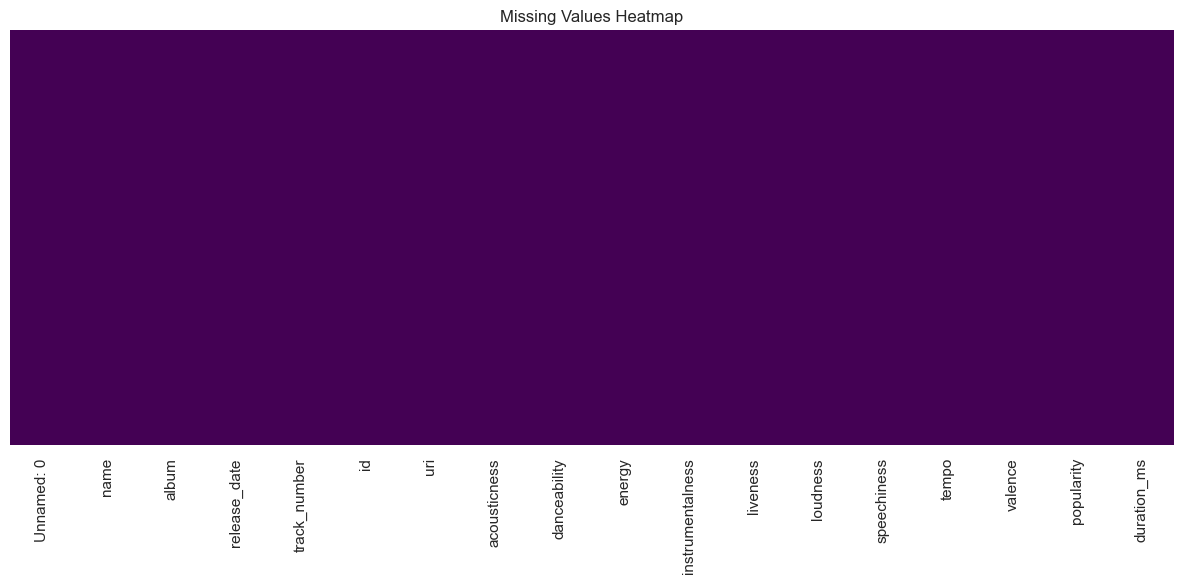

In [3]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nPercentage of missing values in each column:")
print((df.isnull().sum() / len(df)) * 100)

# Visualize missing values if any
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

Our dataset is very clean, with no missing values in any column. Thus, we can proceed to check for duplicates.

## **1.3 Check For Duplicates**

In [4]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# If duplicates exist, examine them
if duplicate_rows > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

# Check for duplicated songs (same song name but different IDs)
print("\nPotential duplicate songs (same name, different IDs):")
duplicate_songs = df[df.duplicated(subset=['name'], keep=False)].sort_values('name')
print(duplicate_songs[['name', 'album', 'id']])


Number of duplicate rows: 0

Potential duplicate songs (same name, different IDs):
                                      name  \
124   (I Can't Get No) Satisfaction - Live   
315   (I Can't Get No) Satisfaction - Live   
1390  (I Can't Get No) Satisfaction - Live   
1402  (I Can't Get No) Satisfaction - Live   
287   (I Can't Get No) Satisfaction - Live   
...                                    ...   
1124             You Gotta Move - 2009 Mix   
955                  You Gotta Move - Live   
413                  You Gotta Move - Live   
945                          You Win Again   
923                          You Win Again   

                                         album                      id  
124                       A Bigger Bang (Live)  0uyhzYLrea2F9PQNbDWKan  
315                 Voodoo Lounge Uncut (Live)  4x0bGTxDypBJaxxR20QPHY  
1390                  got LIVE if you want it!  0tBxqz8qs9iVfktUiIqWph  
1402                  Got Live if you want it!  0U30sZQC2vrOl2buI2ORPD 

Our analysis identified 969 instances where songs with the same title appear multiple times in the Rolling Stones catalog, but with different unique IDs. This is expected and valuable for our analysis, as these represent different recordings of the same song across various albums, live performances, and remastered collections. These variations allow us to explore how the same musical material evolves across different performances, recording contexts, and time periods. Rather than removing these as duplicates, we'll use them to incorporate features like ```is_live```, album context metrics, and temporal information to capture these meaningful differences in our clustering model. This will provide richer insights into the natural groupings within the Rolling Stones' catalog.

## **1.4 Outlier Detection for Numerical Columns**
Let's create a series of box plots that will help us visualize potential outliers.

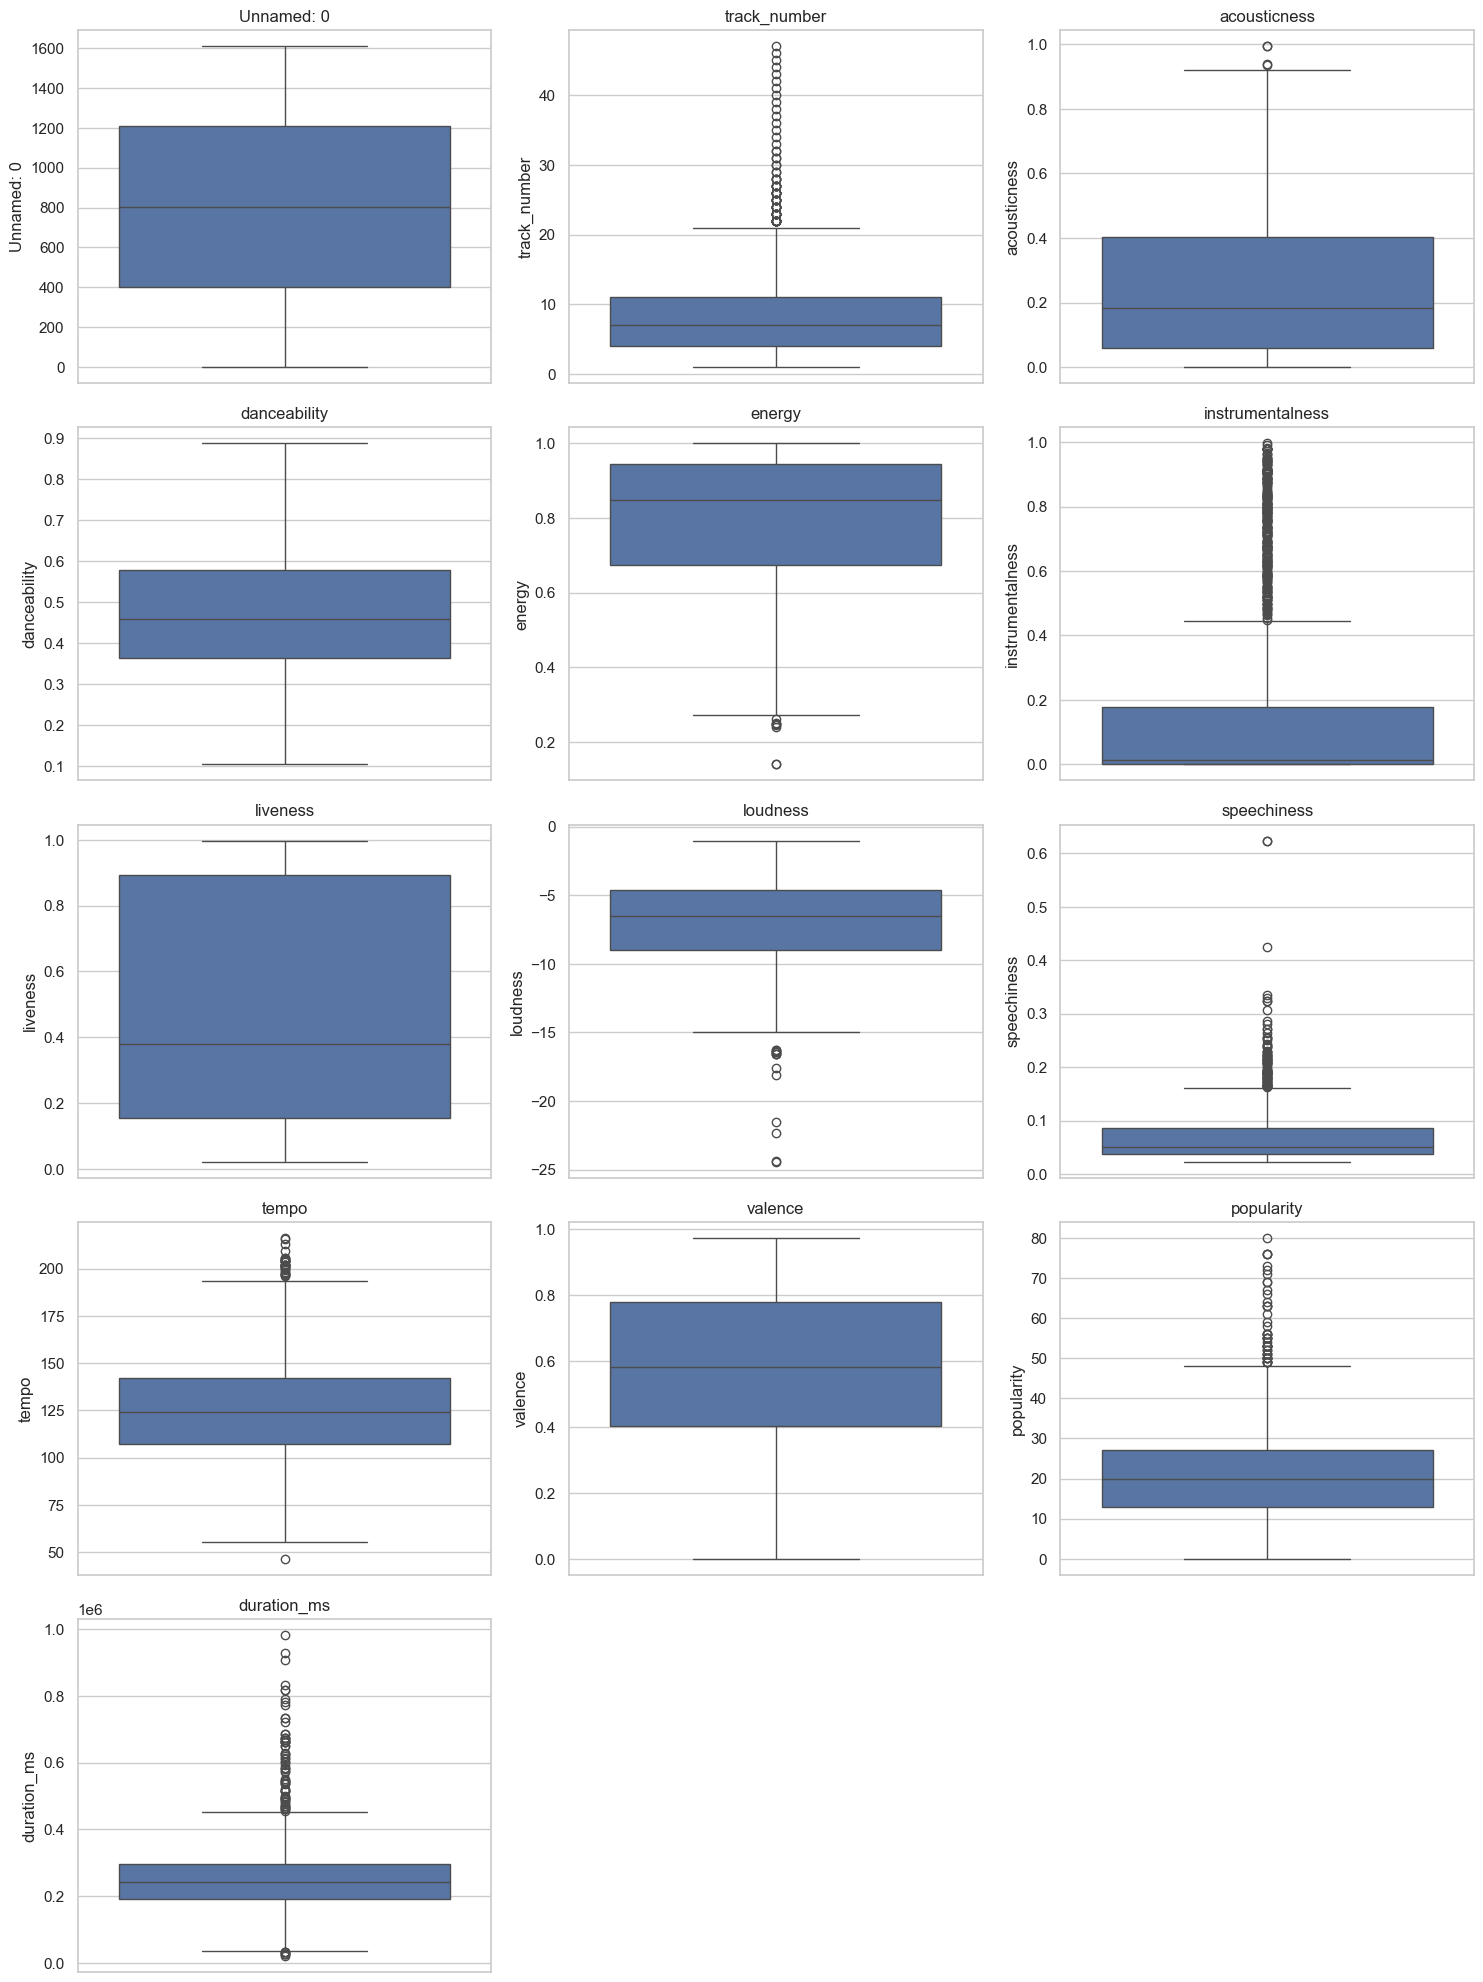

In [5]:
# Select only numerical columns for outlier analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate how many rows and columns we need for the subplot grid
n_plots = len(numerical_cols)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division

# Create boxplots to visualize potential outliers
plt.figure(figsize=(15, n_rows * 4))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.savefig('boxplots_numerical_columns.png', dpi=300, bbox_inches='tight')
plt.show()

## **1.5 Additional Outlier Detection and Handling**
Let's examine potential outliers in more detail. First we'll create a function to detect outliers in the numerical columns based on the interquartile range (IQR) method. Then we'll use this function to find the outliers in each column.

In [6]:
# Let's examine potential outliers in more detail
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in numerical features of interest
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                     'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
                     'popularity', 'duration_ms']

print("\n--- Outlier Detection ---")
for feature in numerical_features:
    outliers, lower, upper = detect_outliers(df, feature)
    if not outliers.empty:
        print(f"\nOutliers in {feature}: {len(outliers)} rows")
        print(f"Bounds: Lower = {lower:.2f}, Upper = {upper:.2f}")
        print(f"Min value: {df[feature].min():.2f}, Max value: {df[feature].max():.2f}")
        
        # List the first five outliers in each column
        if len(outliers) > 0:
            print("Sample outliers:")
            print(outliers[['name', 'album', feature]].head(5))


--- Outlier Detection ---

Outliers in acousticness: 4 rows
Bounds: Lower = -0.46, Upper = 0.92
Min value: 0.00, Max value: 0.99
Sample outliers:
                                                  name  \
165                         100 Years Ago - Piano Demo   
807            Key To The Highway - Piano Instrumental   
818  Key To The Highway - Piano Instrumental/Remast...   
997                                        Fool To Cry   

                            album  acousticness  
165      Goats Head Soup (Deluxe)         0.935  
807                    Dirty Work         0.994  
818  Dirty Work (Remastered 2009)         0.994  
997                Black And Blue         0.939  

Outliers in energy: 8 rows
Bounds: Lower = 0.27, Upper = 1.35
Min value: 0.14, Max value: 1.00
Sample outliers:
                                                   name  \
807             Key To The Highway - Piano Instrumental   
818   Key To The Highway - Piano Instrumental/Remast...   
1115                  

Our outlier analysis identified several extreme values across the audio features, but these represent legitimate musical characteristics rather than erroneous data. Rather than removing these outliers, we'll retain them as they represent genuine musical characteristics that will help inform our cluster analysis:

* Acousticness outliers (4 songs): These are primarily piano instrumentals and demos with exceptionally high acousticness values (>0.93), including '100 Years Ago - Piano Demo' and 'Key To The Highway - Piano Instrumental.'
* Energy outliers (8 songs): These represent unusually low-energy tracks (0.14-0.26), mostly piano instrumentals and mellower songs like 'Back Street Girl' and 'It Hurts Me Too.'
* Instrumentalness outliers (272 songs): This is the largest outlier group, with many live performances having surprisingly high instrumentalness values despite being vocal tracks. This suggests Spotify's algorithm may categorize some live recordings differently.
* Loudness outliers (14 songs): These extremely quiet tracks (< -15.5 dB) include intros, transitions, and certain live recordings.
* Speechiness outliers (92 songs): Primarily live tracks with band introductions and audience interaction, showing higher than typical spoken content.
* Tempo outliers (34 songs): Songs at extreme tempos, including very fast tracks (>200 BPM) like 'It's All Over Now' and very slow intros (~46 BPM).
* Popularity outliers (48 songs): Exceptionally popular songs (>48 popularity score), with the highest being 'Start Me Up - Remastered 2009' at 76.
* Duration outliers (76 songs): Extended tracks over 7.5 minutes, mostly live performances with extended solos, like 'Midnight Rambler - Live' at 13 minutes (781,173 ms).

## **1.6 Check for Inconsistent or Erroneous Data**
We'll check for values that should be within specific bounds. This will include audio features that should be in the range [0,1], song popularity in the range [0,100], and negative duration.

In [7]:
# Examining ranges for values that should be within specific bounds
print("\nChecking for values outside expected ranges:")

# Features that should be between 0 and 1
bounded_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                    'liveness', 'speechiness', 'valence']

for feature in bounded_features:
    invalid_count = df[(df[feature] < 0) | (df[feature] > 1)].shape[0]
    if invalid_count > 0:
        print(f"- {feature}: {invalid_count} values outside [0,1] range")

# Check if popularity is within [0,100]
pop_invalid = df[(df['popularity'] < 0) | (df['popularity'] > 100)].shape[0]
if pop_invalid > 0:
    print(f"- popularity: {pop_invalid} values outside [0,100] range")

# Check for negative duration
dur_invalid = df[df['duration_ms'] <= 0].shape[0]
if dur_invalid > 0:
    print(f"- duration_ms: {dur_invalid} negative or zero values")


Checking for values outside expected ranges:


There are no values outside the expected ranges, so our data is very clean and high-quality in this regard.

## **1.7 Inspect Extreme Values More Closely**
Now we'll take a look at extreme durations, specifically very long and very short songs.

In [8]:
# Let's specifically look at extreme durations
extremely_long = df[df['duration_ms'] > 600000]  # Longer than 10 minutes
extremely_short = df[df['duration_ms'] < 30000]  # Shorter than 30 seconds

print("\n--- Extremely Long Songs (>10 minutes) ---")
print(f"Number of extremely long songs: {len(extremely_long)}")
if len(extremely_long) > 0:
    print(extremely_long[['name', 'album', 'duration_ms']].head())

print("\n--- Extremely Short Songs (<30 seconds) ---")
print(f"Number of extremely short songs: {len(extremely_short)}")
if len(extremely_short) > 0:
    print(extremely_short[['name', 'album', 'duration_ms']].head())


--- Extremely Long Songs (>10 minutes) ---
Number of extremely long songs: 33
                                                  name  \
8                              Midnight Rambler - Live   
15                   Can't You Hear Me Knocking - Live   
80   You Can't Always Get What You Want - Live at W...   
111                            Midnight Rambler - Live   
138                            Midnight Rambler - Live   

                         album  duration_ms  
8           Licked Live In NYC       781173  
15          Licked Live In NYC       667986  
80   Tattoo You (Super Deluxe)       648266  
111       A Bigger Bang (Live)       734706  
138          Steel Wheels Live       620613  

--- Extremely Short Songs (<30 seconds) ---
Number of extremely short songs: 4
                                                  name  \
546                                  Show Intro - Live   
739                           Continental Drift - Live   
756         Continental Drift - Live / Rem

There are 33 extremely long songs (longer than 10 minutes in length) and only 4 extremely short songs (shorter than 30 seconds). Together these represent just a tiny proportion of our overall dataset, so there's no need to make any adjustments based on these outliers.

## **1.8 Check for Potential Erroneous Entries**
We'll check for songs with the abnormal feature combination of high energy and low loudness, along with songs that have 0 popularity.

In [9]:
# Check if there are any songs with abnormal feature combinations
# For example, songs with high energy but low loudness would be unusual
erroneous_candidates = df[(df['energy'] > 0.8) & (df['loudness'] < -15)]
print("\n--- Potential Erroneous Entries (High Energy, Low Loudness) ---")
print(f"Number of potential erroneous entries: {len(erroneous_candidates)}")
if len(erroneous_candidates) > 0:
    print(erroneous_candidates[['name', 'album', 'energy', 'loudness']].head())

# Investigate songs with 0 popularity (might be errors or very obscure songs)
zero_popularity = df[df['popularity'] == 0]
print("\n--- Songs with Zero Popularity ---")
print(f"Number of songs with zero popularity: {len(zero_popularity)}")
if len(zero_popularity) > 0:
    print(zero_popularity[['name', 'album', 'release_date']].head())


--- Potential Erroneous Entries (High Energy, Low Loudness) ---
Number of potential erroneous entries: 1
                  name                                              album  \
546  Show Intro - Live  Live 1965: Music From Charlie Is My Darling (L...   

     energy  loudness  
546   0.870   -18.104  

--- Songs with Zero Popularity ---
Number of songs with zero popularity: 17
                                                   name  \
272   Beast Of Burden - Live At Arrowhead Stadium, K...   
546                                   Show Intro - Live   
587                         Next Time You See Me - Live   
739                            Continental Drift - Live   
1338                                       All Sold Out   

                                                  album release_date  
272                                       Honk (Deluxe)   2019-04-19  
546   Live 1965: Music From Charlie Is My Darling (L...   2012-11-06  
587                     Live At The Checkerboa

Our analysis of potentially problematic data points revealed minimal issues. There is only one potentially erroneous entry, but it appears to be a legitimate special case—likely a high-energy but poorly recorded live intro, rather than an error in the data.

We also identified 17 songs with a popularity score of zero. However, the zero popularity scores likely indicate that these tracks get minimal streaming attention rather than suggesting data errors. Some are intros/transitions, while others seem to be obscure deep cuts or redundant versions that listeners rarely select compared to the original studio recordings.

Both of these edge cases represent valid data points that provide useful context for our clustering, so we retained them in our analysis.

## **1.9 Examine the Distributions of Release Dates**
Now we'll visualize the distributions of Rolling Stones songs released by year and by decade.


Release date distribution:
release_date
1972-05-12    75
1971-04-23    63
2021-10-22    57
2018-11-16    56
1978-06-09    54
2017-12-01    50
1967-01-20    48
1965-07-30    48
2019-04-19    47
1970-09-04    47
Name: count, dtype: int64
Earliest date: 1964-04-16
Latest date: 2022-06-10


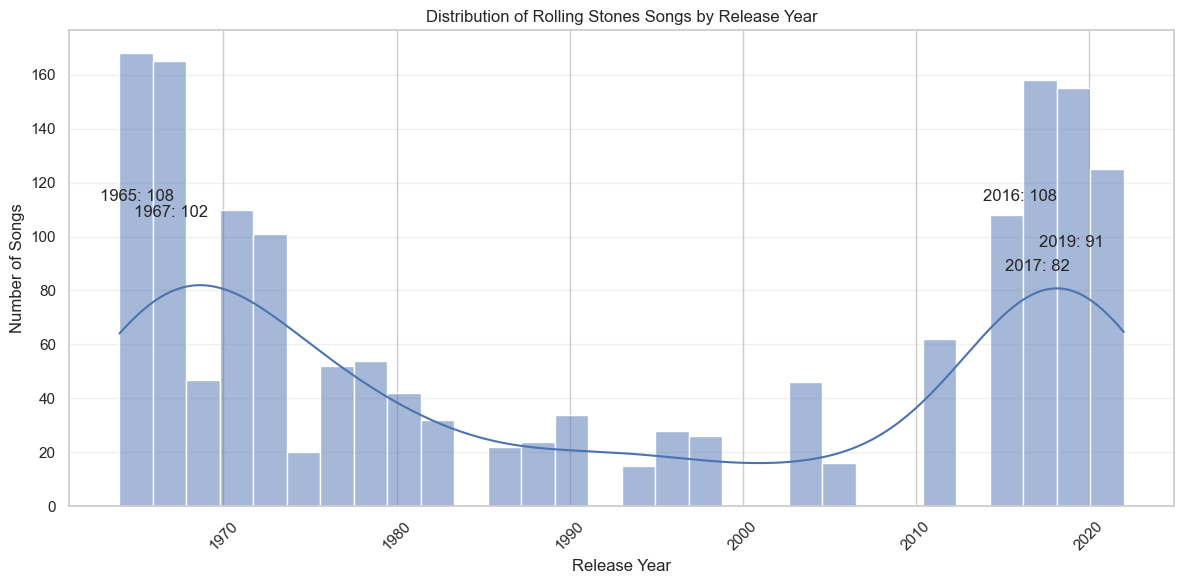

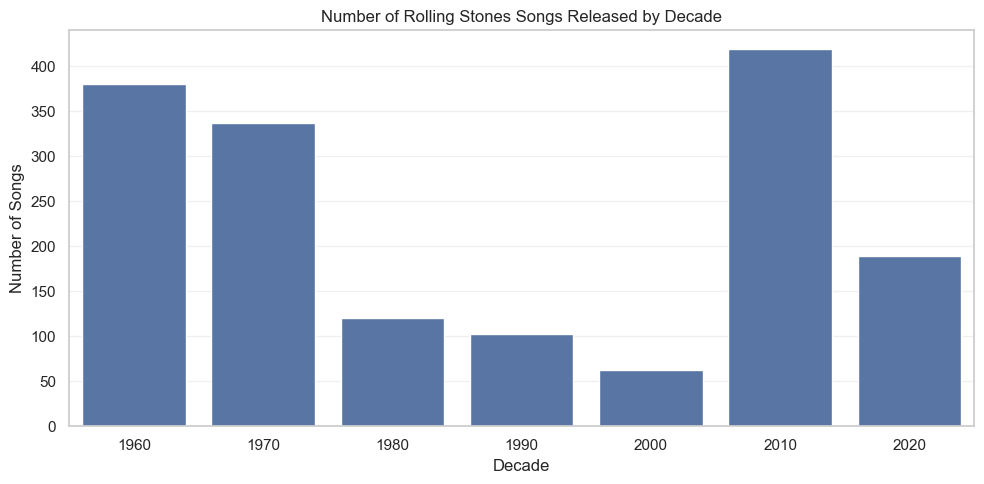

In [10]:
# Examine the distributions of release dates
print("\nRelease date distribution:")
print(df['release_date'].value_counts().head(10))
print("Earliest date:", df['release_date'].min())
print("Latest date:", df['release_date'].max())

# Plot release date distribution
plt.figure(figsize=(12, 6))

# Convert release_date to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['release_date']):
    df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year for a cleaner visualization
df['release_year'] = df['release_date'].dt.year

# Create histogram of release years
ax = sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title('Distribution of Rolling Stones Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)

# Add a grid for better readability
plt.grid(axis='y', alpha=0.3)

# Add annotations for significant peaks
year_counts = df['release_year'].value_counts().sort_index()
top_years = year_counts.nlargest(5)
for year, count in top_years.items():
    plt.annotate(f'{year}: {count}', 
                 xy=(year, count), 
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center')

plt.tight_layout()
plt.savefig('distribution_songs_by_release_year.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional view: Songs per decade
df['decade'] = (df['release_year'] // 10) * 10
plt.figure(figsize=(10, 5))
decade_counts = df['decade'].value_counts().sort_index()
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.title('Number of Rolling Stones Songs Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('distribution_songs_by_decade.png', dpi=300, bbox_inches='tight')
plt.show()

The song release distributions are both bimodal distributions, with two peaks occurring near the 1970s-1980s and 2010s-2020s. This suggests that Rolling Stones songs were initially very popular, before going through a multi-decade lull and then experiencing a resurgence in popularity in recent years.

# **2 Refine the Data Based on Our Findings**
As mentioned earlier, we'll keep the outliers for now, as they appear to be legitimate data points that will inform our cluster analysis. Thus, it is unnecessary to refine the data further based on the above findings. We'll create an identical copy of the original DataFrame, while dropping the ```Unnamed: 0``` column (which is simply a redundant index column).

In [11]:
# Final cleaned data
df_clean = df.copy()
df_clean = df_clean.drop(columns=['Unnamed: 0'])

# Convert release_date to datetime format
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

# We'll keep the outliers for now as they appear to be legitimate data points
# For example, very short songs might be intros or interludes
# Very long songs might be special performances or compilations

# 3. Create additional features that might be useful for analysis
# Extract year from release_date
#df_clean['release_year'] = df_clean['release_date'].dt.year
# Extract decade for potential grouping
#df_clean['decade'] = (df_clean['release_year'] // 10) * 10

# 4. Convert duration from milliseconds to seconds for easier interpretation
#df_clean['duration_sec'] = df_clean['duration_ms'] / 1000

# 5. Add a column indicating if the song is a live version
#df_clean['is_live'] = df_clean['name'].str.contains('Live', case=False) | df_clean['album'].str.contains('Live', case=False)

# Save the cleaned dataset
df_clean.to_csv('rolling_stones_spotify_clean.csv', index=False)

# Summary of data cleaning
print("\nData cleaning summary:")
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")


Data cleaning summary:
Original dataset shape: (1610, 20)
Cleaned dataset shape: (1610, 19)


# **3: Exploratory Data Analysis and Feature Engineering**
In this section, we'll accomplish the following objectives:
* Use appropriate visualizations to determine the two albums that should be recommended to anyone based on the amount of popular songs in each album
* Conduct exploratory data analysis to identify patterns in various song features
* Explore the correlation between a song's popularity and various factors
* Conduct principle components analysis (PCA) for dimensionality reduction
## **3.1 Identify the Two Most Popular Albums**
Here we'll create new features for the following:
* Average popularity and song counts in each album
* Number and percentage of popular songs per album

Top 10 Albums by Number of Popular Songs:
                                         album  popular_songs  song_count  \
68                 Sticky Fingers (Remastered)          6.000          10   
26     Exile On Main Street (2010 Re-Mastered)          4.000          18   
74               Tattoo You (2009 Re-Mastered)          3.000          11   
61                                  Some Girls          3.000          10   
19       December’s Children (And Everybody’s)          2.000          12   
57                            Out Of Our Heads          2.000          12   
8                          Between The Buttons          2.000          24   
23         Emotional Rescue (2009 Re-Mastered)          2.000          10   
7   Beggars Banquet (50th Anniversary Edition)          2.000          10   
4                                    Aftermath          2.000          11   

    avg_popularity  popular_percentage  
68          53.300              60.000  
26          44.167          

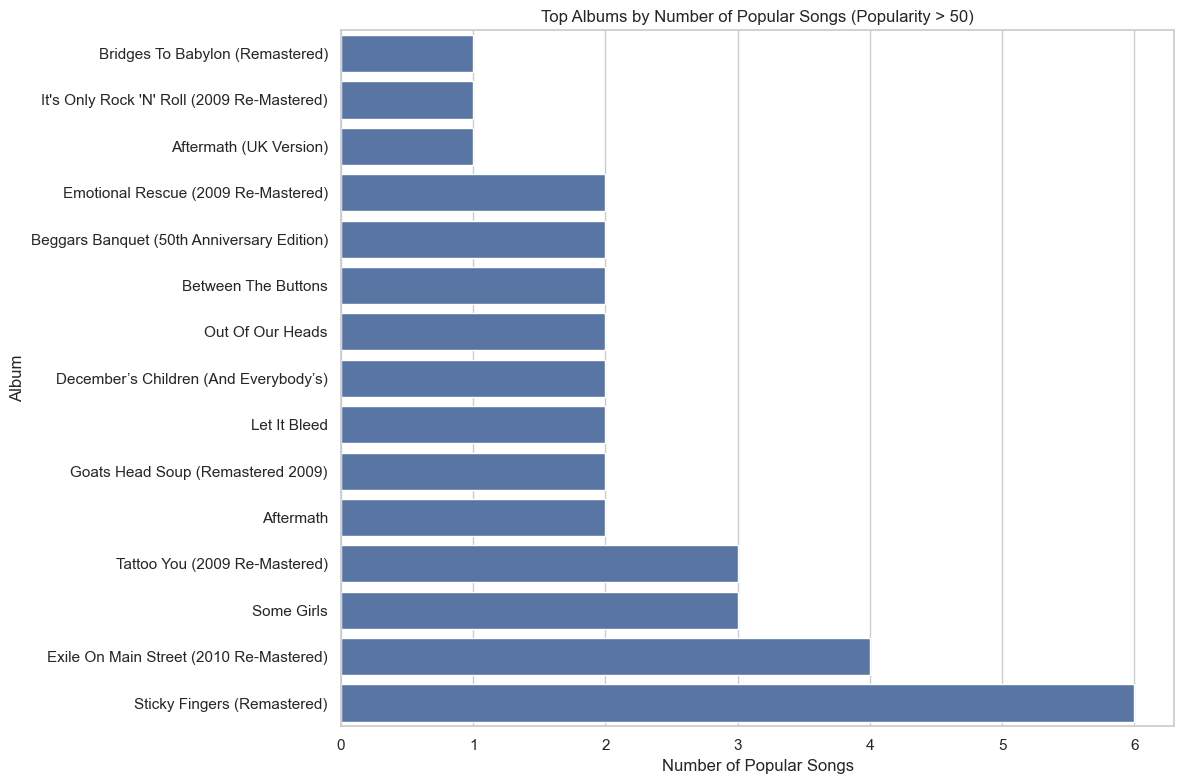

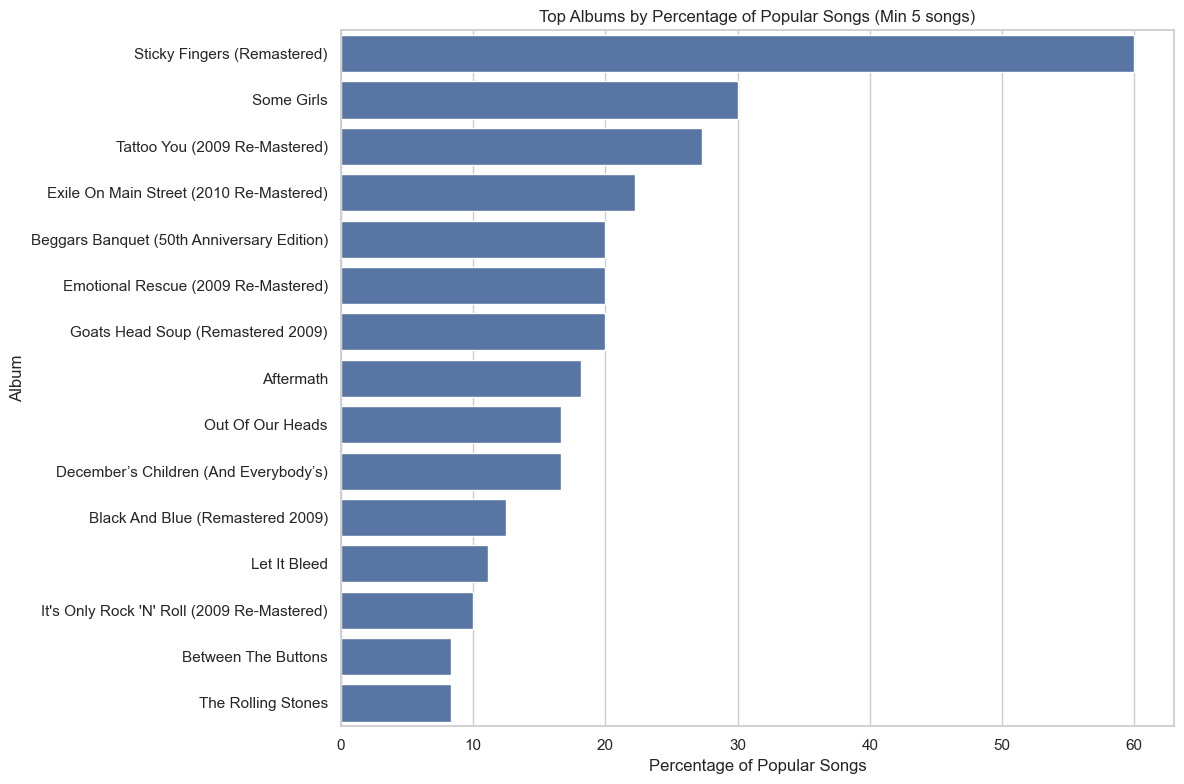

In [12]:
# Calculate average popularity and song count for each album
album_stats = df_clean.groupby('album').agg(
    avg_popularity=('popularity', 'mean'),
    song_count=('name', 'count'),
    min_popularity=('popularity', 'min'),
    max_popularity=('popularity', 'max')
).reset_index()

# Calculate number of popular songs per album (popularity > 50)
popular_songs = df_clean[df_clean['popularity'] > 50].groupby('album').size().reset_index(name='popular_songs')
album_stats = album_stats.merge(popular_songs, on='album', how='left')
album_stats['popular_songs'] = album_stats['popular_songs'].fillna(0)

# Calculate percentage of popular songs
album_stats['popular_percentage'] = (album_stats['popular_songs'] / album_stats['song_count']) * 100

# Sort by number of popular songs (descending)
album_stats = album_stats.sort_values('popular_songs', ascending=False)

# Display the top albums by popular song count
print("Top 10 Albums by Number of Popular Songs:")
print(album_stats.head(10)[['album', 'popular_songs', 'song_count', 'avg_popularity', 'popular_percentage']])

# Visualize top albums by number of popular songs
plt.figure(figsize=(12, 8))
top_albums = album_stats.head(15).sort_values('popular_songs')
sns.barplot(y='album', x='popular_songs', data=top_albums)
plt.title('Top Albums by Number of Popular Songs (Popularity > 50)')
plt.xlabel('Number of Popular Songs')
plt.ylabel('Album')
plt.tight_layout()
plt.show()

# Visualize top albums by popularity percentage (only for albums with at least 5 songs)
plt.figure(figsize=(12, 8))
top_percentage = album_stats[album_stats['song_count'] >= 5].sort_values('popular_percentage', ascending=False).head(15)
sns.barplot(y='album', x='popular_percentage', data=top_percentage)
plt.title('Top Albums by Percentage of Popular Songs (Min 5 songs)')
plt.xlabel('Percentage of Popular Songs')
plt.ylabel('Album')
plt.tight_layout()
plt.show()

The top two albums by number of popular songs are "Sticky Fingers (Remastered)" and "Exile on Main Street (2010 Re-Mastered)." Additionally, "Sticky Fingers (Remastered)" and "Some Girls" have the two highest percentages of popular songs, while "Exile on Main Street (2010 Re-Mastered)" ranked fourth. Thus, the two albums that should be recommended to anyone are "Sticky Fingers (Remastered)" and "Exile on Main Street (2010 Re-Mastered)."

## **3.2 Exploratory Data Analysis to Identify Patterns in Song Features**
Here, we'll plot the correlation matrix of audio features, feature patterns by decade, feature trends over decades, and a comparison of live vs. studio recordings. We'll treat live recordings as those with a liveness value of at least 0.8

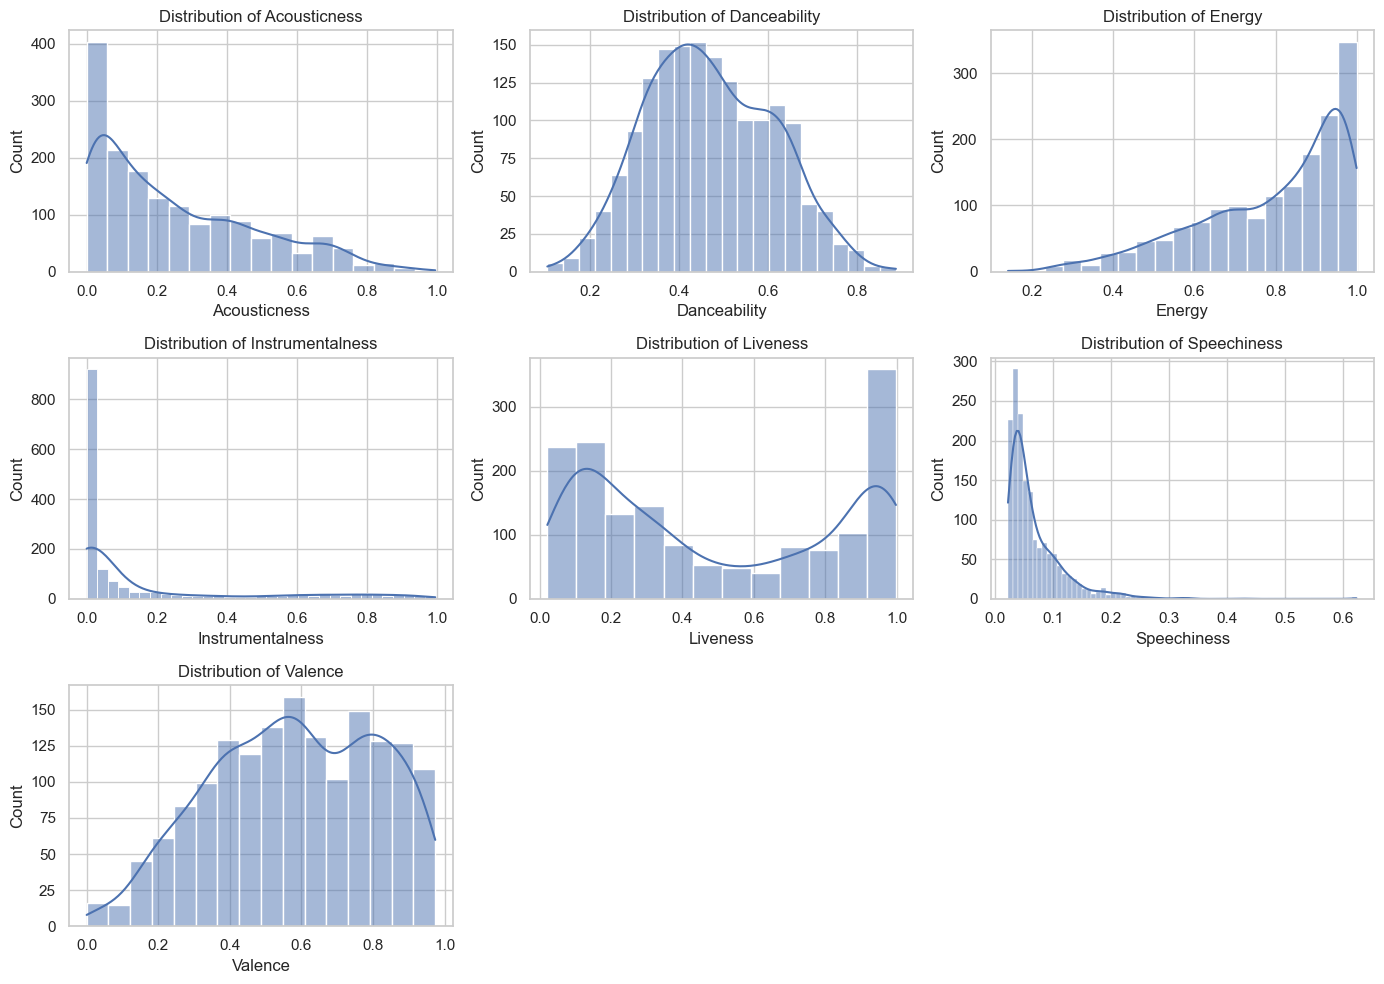

Correlation matrix:

                  acousticness  danceability  energy  instrumentalness  \
acousticness             1.000         0.070  -0.364             0.061   
danceability             0.070         1.000  -0.301            -0.032   
energy                  -0.364        -0.301   1.000             0.120   
instrumentalness         0.061        -0.032   0.120             1.000   
liveness                -0.118        -0.516   0.511             0.009   
speechiness             -0.022        -0.323   0.417             0.010   
valence                 -0.139         0.546   0.046             0.103   
tempo                   -0.171        -0.324   0.202             0.011   
loudness                -0.237        -0.249   0.698             0.013   
popularity               0.108         0.141  -0.057            -0.011   

                  liveness  speechiness  valence  tempo  loudness  popularity  
acousticness        -0.118       -0.022   -0.139 -0.171    -0.237       0.108  
danc

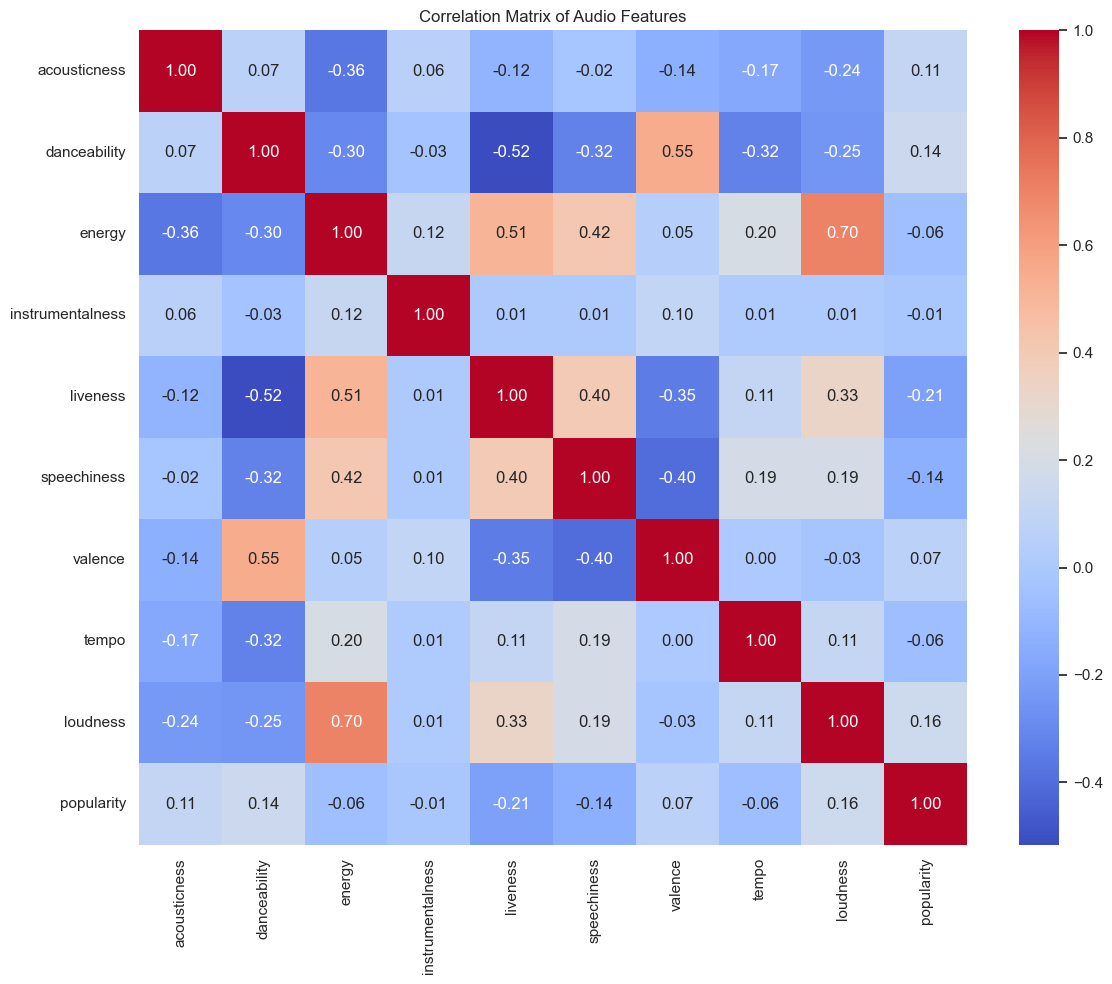

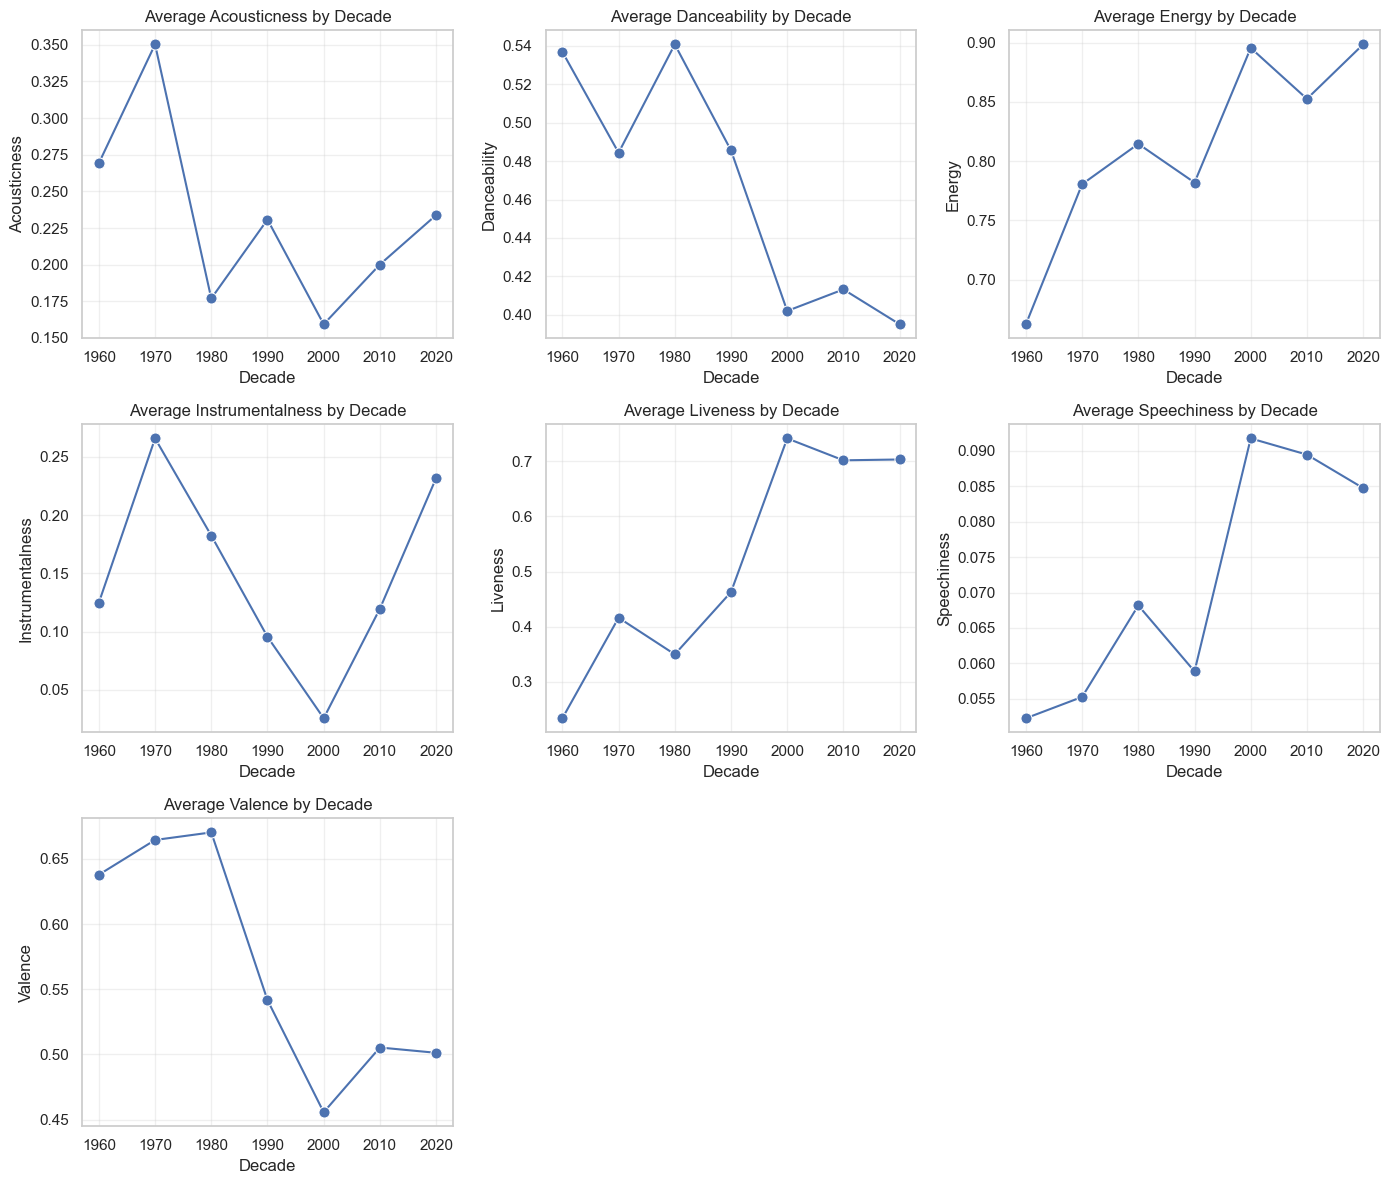

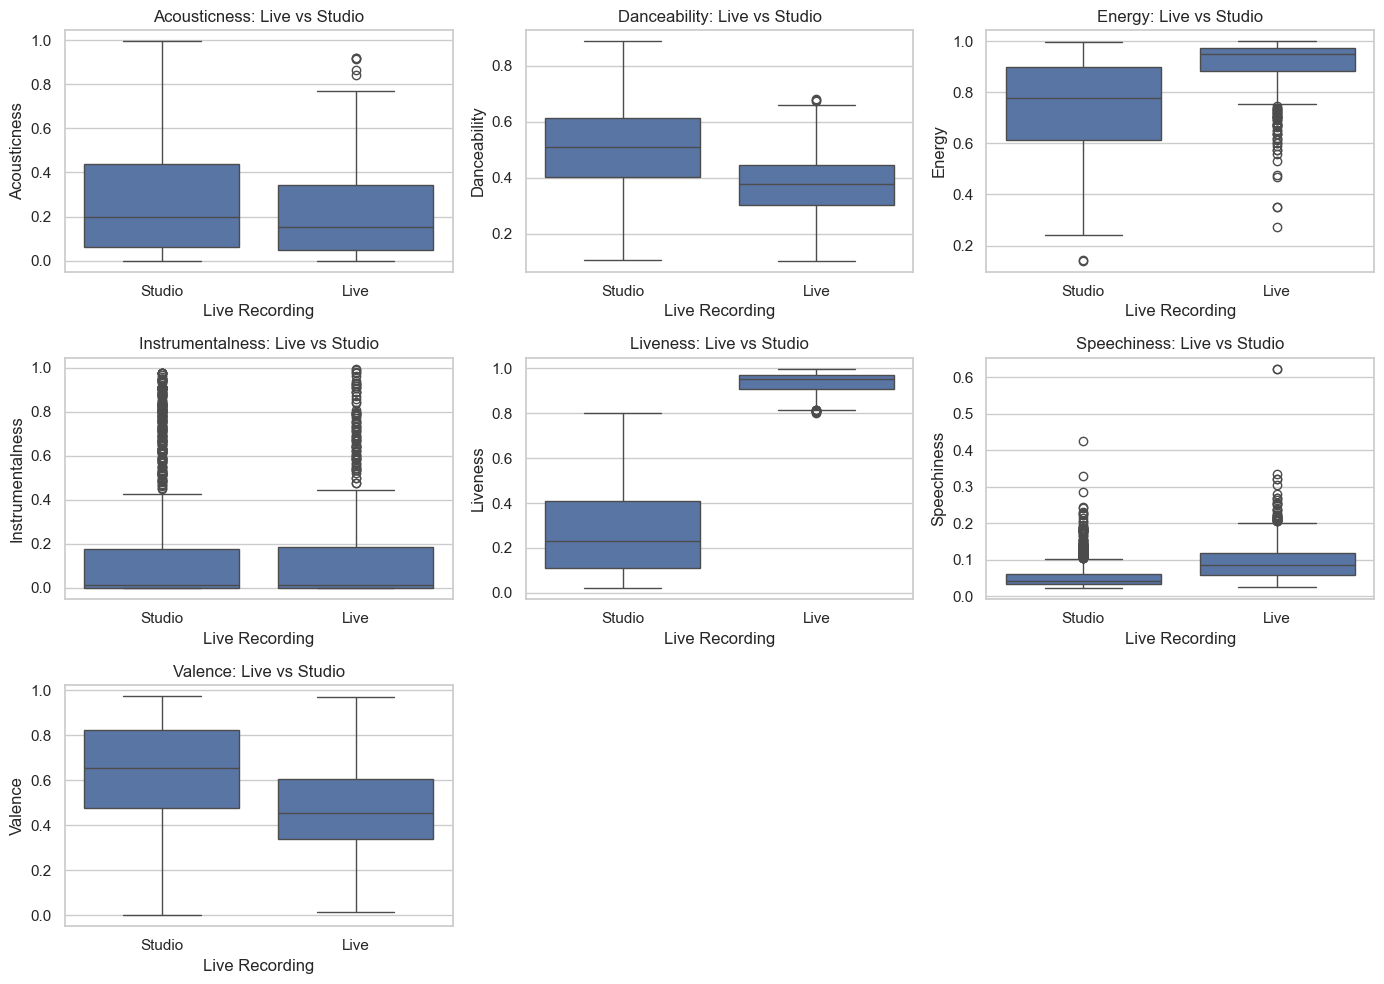

In [13]:
# Distribution of audio features
plt.figure(figsize=(14, 10))
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'speechiness', 'valence']

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('distribution_of_audio_features.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation matrix of audio features
plt.figure(figsize=(12, 10))
corr_matrix = df_clean[features + ['tempo', 'loudness', 'popularity']].corr()
#print("Correlation matrix:\n")
#print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.savefig('correlation_matrix_audio_features.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature patterns by decade
# Create new features for release year and decade
df_clean['release_year'] = df_clean['release_date'].dt.year
df_clean['decade'] = (df_clean['release_year'] // 10) * 10

decade_features = df_clean.groupby('decade')[features].mean().reset_index()

# Plot feature trends over decades
plt.figure(figsize=(14, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(x='decade', y=feature, data=decade_features, marker='o', markersize=8)
    plt.title(f'Average {feature.capitalize()} by Decade')
    plt.xlabel('Decade')
    plt.ylabel(feature.capitalize())
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('feature_trends_over_decades.png', dpi=300, bbox_inches='tight')
plt.show()

# Create feature to identify live recordings
df_clean['is_live'] = (df_clean['liveness'] > 0.8).astype(int)

# Compare features for live vs studio recordings
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='is_live', y=feature, data=df_clean)
    plt.title(f'{feature.capitalize()}: Live vs Studio')
    plt.xlabel('Live Recording')
    plt.ylabel(feature.capitalize())
    plt.xticks([0, 1], ['Studio', 'Live'])
plt.tight_layout()
plt.savefig('live_vs_studio_features.png', dpi=300, bbox_inches='tight')
plt.show()

Our exploratory data analysis revealed several distinct patterns in the Rolling Stones' catalog:

### **Audio Feature Distributions:**
The distribution histograms show that the Rolling Stones' songs typically feature high energy (strongly left-skewed distribution with most songs >0.8), low acousticness (right-skewed), and a wide range of valence values (fairly uniform distribution). The bimodal distribution of liveness clearly separates studio recordings from live performances, while instrumentalness is extremely low across most songs, confirming their primarily vocal-focused approach.
### **Feature Correlations:**
The correlation matrix highlighted strong relationships between certain audio features. Energy and loudness showed the strongest positive correlation (0.70), which makes sense since high-energy songs should typically exhibit higher loudness. Danceability and valence were also positively correlated (0.55). Interestingly, danceability and liveness exhibited a strong negative correlation (-0.52), indicating that live recordings tend to be less danceable despite often having higher energy.
### **Temporal Evolution:**
The decade-by-decade analysis demonstrated a clear evolution in the band's sound. The 1970s showed peak acousticness and valence (happier/more positive songs), while energy steadily increased from the 1960s to 2000s. Danceability exhibited a cyclical pattern early on, peaking in the 1960s and 1980s before declining sharply in recent decades. A dramatic increase in liveness post-1990 reflects the predominance of live recordings in their later catalog.
### **Live vs. Studio Differences:**
The boxplot comparisons revealed significant differences between live and studio recordings. Live versions typically feature higher energy and speechiness but lower danceability and valence than their studio counterparts. These consistent differences suggest recording context strongly influences musical characteristics.

## **3.3 Examine Relationship Between Popularity and Various Factors**
Let's take a look at the correlation between popularity and audio features. We'll plot these correlations in a bar plot, along with scatter plots of popularity vs. several key features. Finally, we'll plot the evolution of popularity correlation with key features over time.

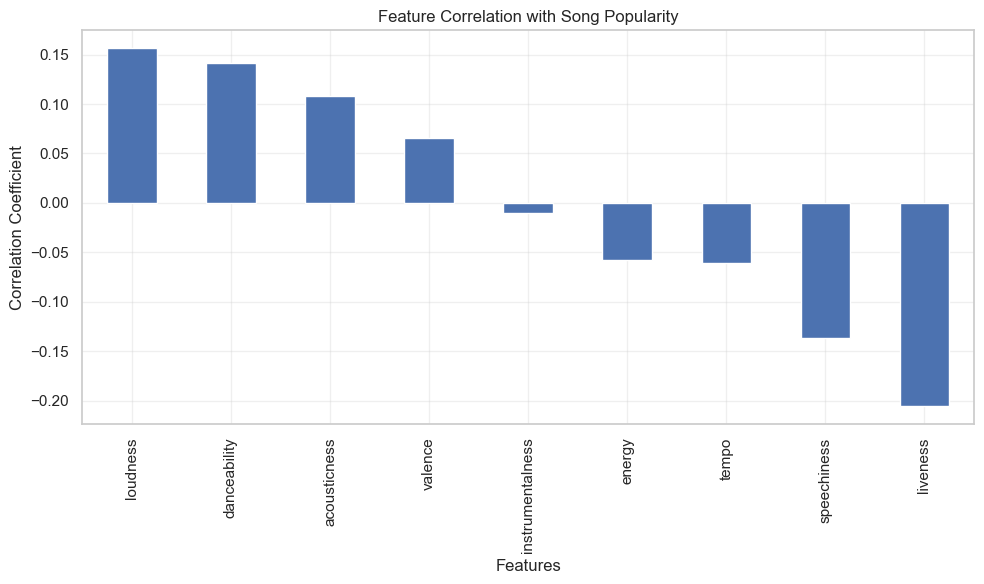

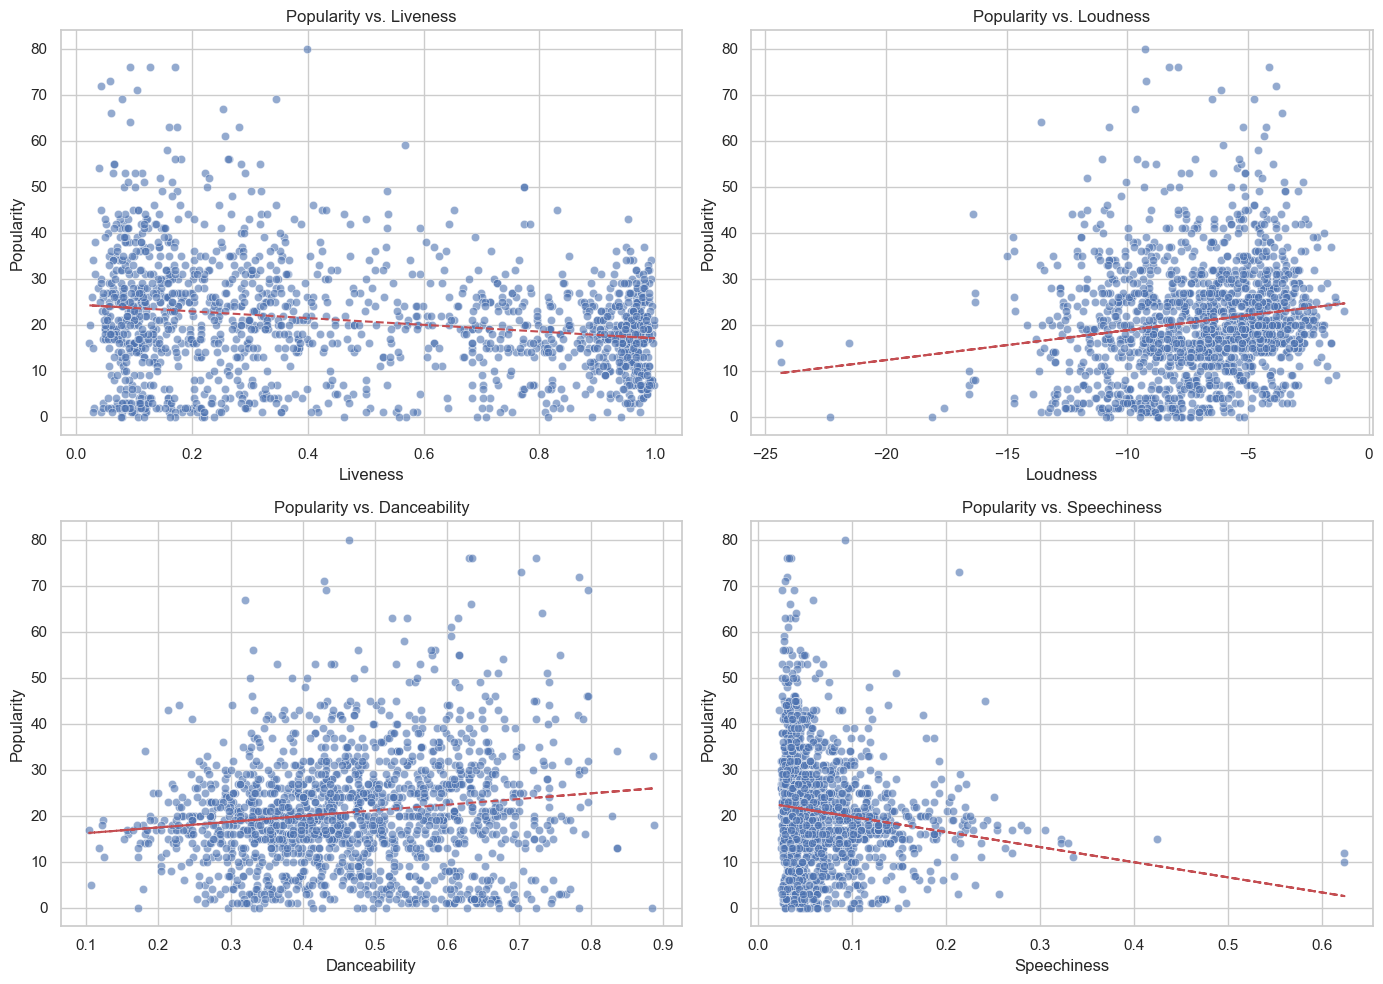

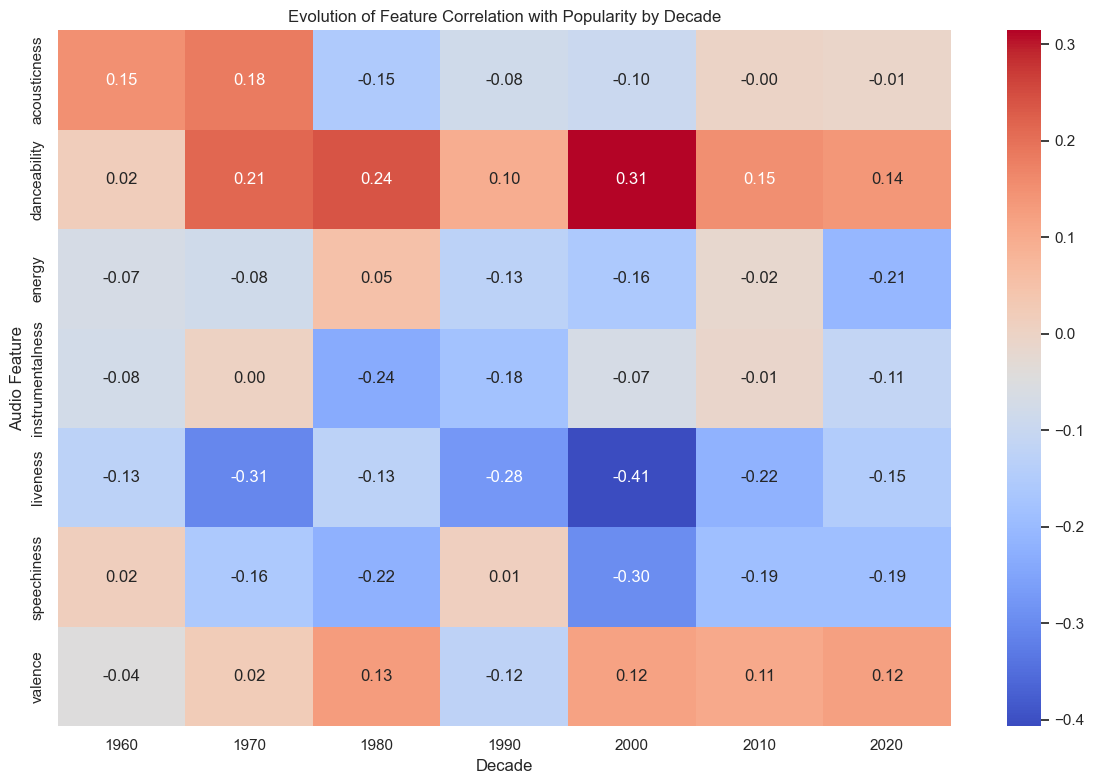

In [14]:
# Correlation between popularity and audio features
popularity_corr = corr_matrix['popularity'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
popularity_corr.drop('popularity').plot(kind='bar')
plt.title('Feature Correlation with Song Popularity')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('feature_correlation_with_song_popularity.png', dpi=300, bbox_inches='tight')
plt.show()

# Scatter plots of popularity vs. key features
plt.figure(figsize=(14, 10))
top_corr_features = popularity_corr.drop('popularity').abs().sort_values(ascending=False).head(4).index.tolist()

for i, feature in enumerate(top_corr_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='popularity', data=df_clean, alpha=0.6)
    plt.title(f'Popularity vs. {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Popularity')
    
    # Add trend line
    z = np.polyfit(df_clean[feature], df_clean['popularity'], 1)
    p = np.poly1d(z)
    plt.plot(df_clean[feature], p(df_clean[feature]), "r--")
plt.tight_layout()
plt.savefig('popularity_vs_key_features.png', dpi=300, bbox_inches='tight')
plt.show()

# How has popularity correlation changed over time?
decades = df_clean['decade'].unique()
popularity_corr_trend = pd.DataFrame(index=features)

for decade in sorted(decades):
    decade_df = df_clean[df_clean['decade'] == decade]
    if len(decade_df) > 5:  # Only compute if we have enough data
        corr_values = decade_df[features + ['popularity']].corr()['popularity'][features]
        popularity_corr_trend[decade] = corr_values

# Plot how correlations have changed
plt.figure(figsize=(12, 8))
sns.heatmap(popularity_corr_trend, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Evolution of Feature Correlation with Popularity by Decade')
plt.ylabel('Audio Feature')
plt.xlabel('Decade')
plt.tight_layout()
plt.savefig('evolution_of_feature_correlation_with_popularity_by_decade.png', dpi=300, bbox_inches='tight')
plt.show()

Our analysis of how song popularity relates to audio features revealed several key insights:

### **Popularity Factors:**
The bar chart of feature correlations showed that loudness (0.16) had the strongest positive relationship with popularity, followed by danceability (0.14) and acousticness (0.11). Conversely, liveness (-0.21) and speechiness (-0.14) showed the strongest negative correlations. This suggests that well-produced studio recordings with high production values tend to be more popular than live performances or tracks with more spoken content.
### **Scatter Plot Relationships:**
The scatter plots comparing popularity against key features revealed weak but consistent patterns. The loudness vs. popularity plot showed a gradual positive trend, while the liveness vs. popularity plot demonstrated a slight negative trend. Danceability showed a modest positive association with more popular songs appearing in the upper range of danceability values, but with considerable variance. Popularity had a slight negative correlation with speechiness, indicating that dedicated musical productions were more popular than tracks with more spoken content.
### **Evolution of Popularity Relationships:**
The heatmap tracking how feature correlations changed across decades revealed fascinating shifts in what made Rolling Stones songs popular in different eras. Notably, danceability became increasingly important in the 2000s (correlation of 0.31), while its correlation was negligible in the 1960s (0.02). The negative correlation between liveness and popularity grew stronger in recent decades, reaching -0.41 in the 2000s compared to -0.13 in the 1960s.
### **Temporal Context:**
When combining this with our decade analysis from earlier, we can see that while the band's sound has evolved toward higher energy and liveness in recent decades, listener preferences still favor their more well-produced studio recordings with higher danceability. This suggests a potential disconnect between the band's artistic evolution and what audiences stream most frequently.

These insights provide valuable context for our clustering approach, indicating that popularity-based groupings may cut across different eras and reveal preference patterns that don't strictly follow chronological development.

## **3.4 Dimensionality Reduction Analysis**
We'll use principal components analysis (PCA) as a dimensionality reduction technique for our feature set. This can help reduce our set of features and improve the model's efficiency. For simplicity, we'll determine the ideal number of principal components based on an 80% threshold for explained variance.

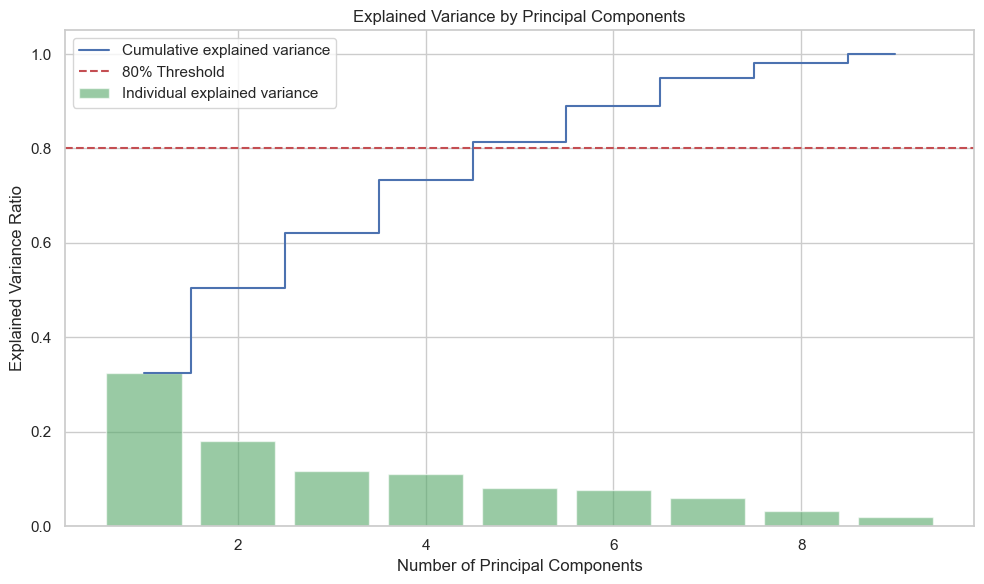


Optimal number of PCA components (80% variance): 5


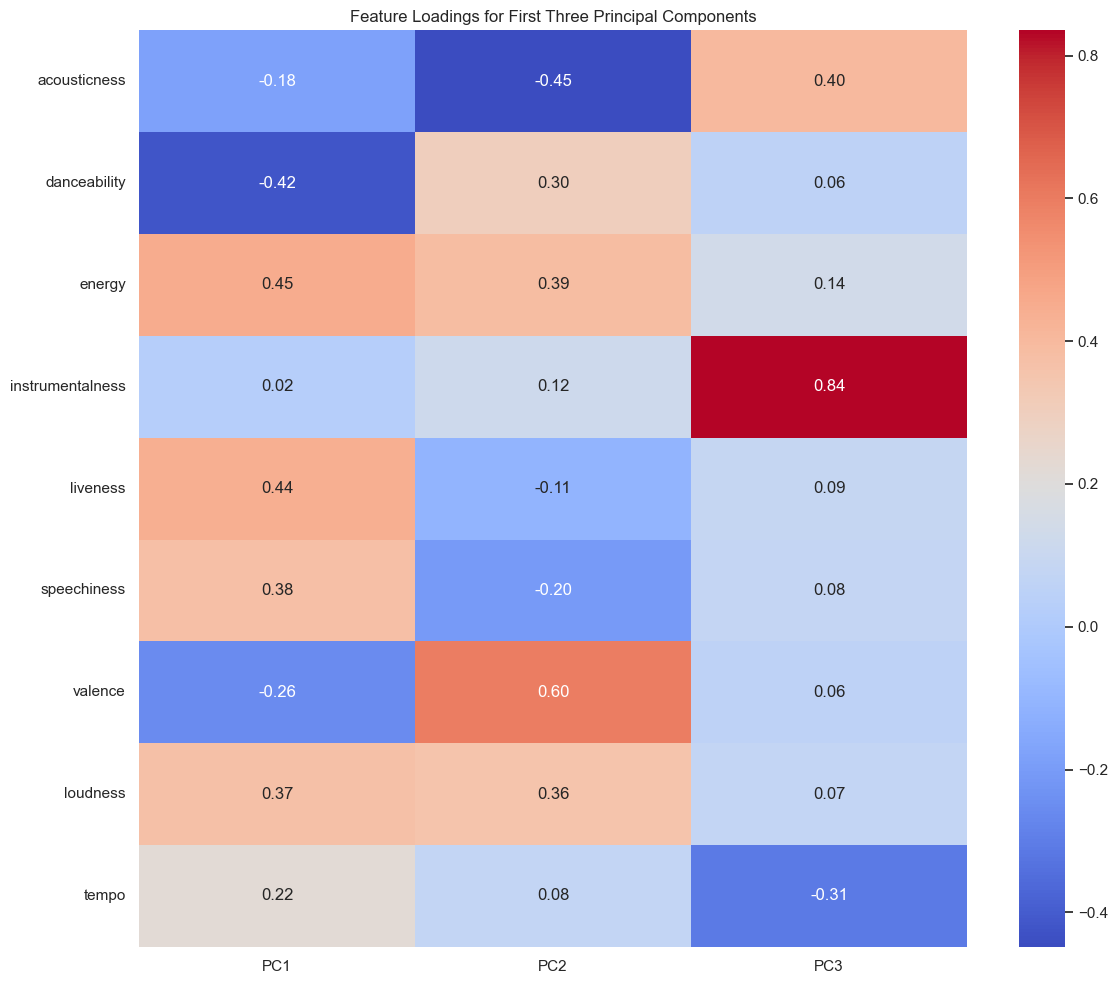

PC1 range: -4.8683070584948345 to 4.378139304638434
PC2 range: -5.617753679644146 to 2.7075317493071056


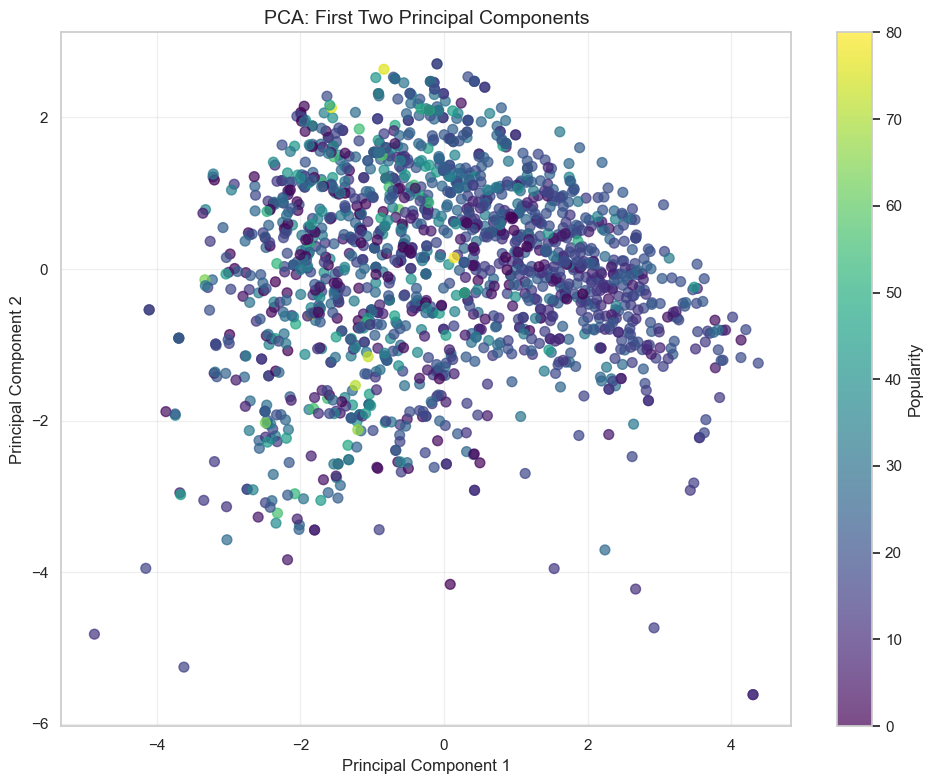

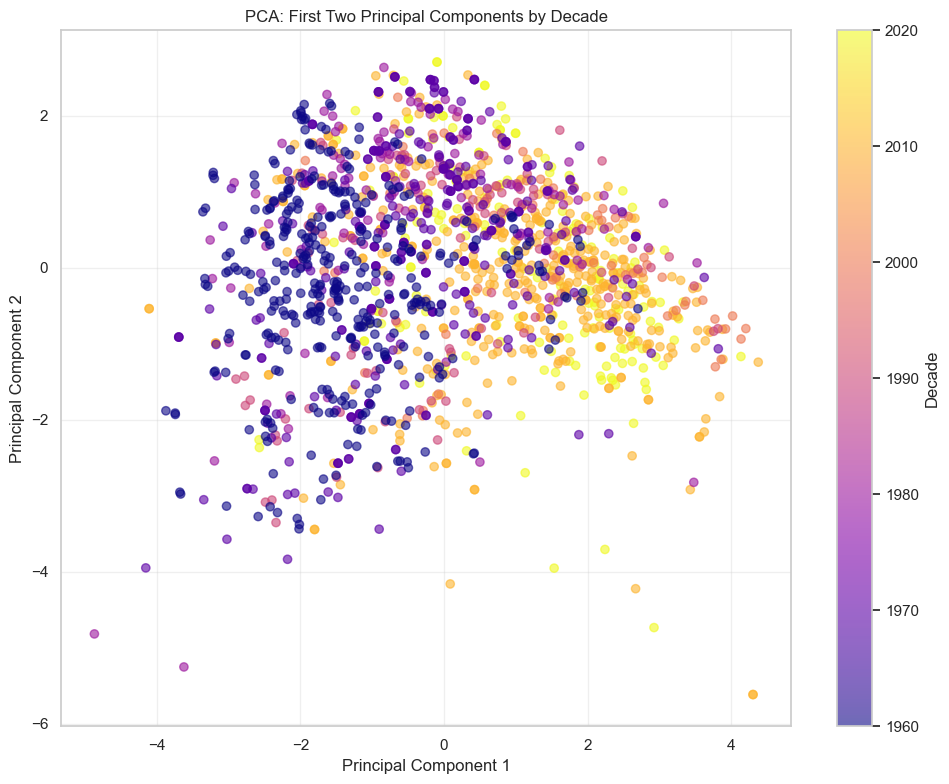


Dimensionality Reduction Insights:
1. We can reduce from 9 features to 5 principal components while preserving 80% of variance
2. The most important features for the first principal component are:
   - energy: 0.452
   - liveness: 0.444
   - danceability: 0.418
3. The most important features for the second principal component are:
   - valence: 0.598
   - acousticness: 0.448
   - energy: 0.386


In [15]:
# Select features for PCA
features_for_pca = features + ['loudness', 'tempo']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[features_for_pca])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='g', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# Determine optimal number of components (e.g., 80% variance)
optimal_components = np.where(cumulative_variance >= 0.8)[0][0] + 1
print(f"\nOptimal number of PCA components (80% variance): {optimal_components}")

# Feature loadings (contribution of each feature to the principal components)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features_for_pca))],
    index=features_for_pca
)

# Visualize feature loadings for first three components
plt.figure(figsize=(12, 10))
sns.heatmap(loadings.iloc[:, :3], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Loadings for First Three Principal Components')
plt.tight_layout()
plt.savefig('feature_loadings_first_three.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize first two principal components, colored by popularity
'''plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                      c=df_clean['popularity'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Popularity')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_first_two.png', dpi=300, bbox_inches='tight')
plt.show()'''

# Visualize first two principal components, colored by popularity
plt.figure(figsize=(10, 8))

# Check for NaN values
if np.isnan(pca_result).any():
    print("Warning: PCA result contains NaN values")
    # Replace NaNs with zeros for visualization
    pca_result = np.nan_to_fill(pca_result, 0)

# Check ranges of the first two components
print(f"PC1 range: {pca_result[:, 0].min()} to {pca_result[:, 0].max()}")
print(f"PC2 range: {pca_result[:, 1].min()} to {pca_result[:, 1].max()}")

# Create the scatter plot with larger point size
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                     c=df_clean['popularity'], cmap='viridis', 
                     alpha=0.7, s=50)  # Increased point size and opacity

plt.colorbar(scatter, label='Popularity')
plt.title('PCA: First Two Principal Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, alpha=0.3)

# Add figure borders
plt.box(True)

# Save the figure before showing
plt.tight_layout()
plt.savefig('pca_first_two.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Now show the saved image to confirm it worked
#from IPython.display import Image
#Image('pca_first_two.png')

# Visualize first two principal components, colored by decade
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                      c=df_clean['decade'], cmap='plasma', alpha=0.6)
plt.colorbar(scatter, label='Decade')
plt.title('PCA: First Two Principal Components by Decade')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_first_two_by_decade.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary of findings from dimensionality reduction
print("\nDimensionality Reduction Insights:")
print(f"1. We can reduce from {len(features_for_pca)} features to {optimal_components} principal components while preserving 80% of variance")
print("2. The most important features for the first principal component are:")
pc1_loadings = loadings['PC1'].abs().sort_values(ascending=False)
for feature, loading in pc1_loadings.head(3).items():
    print(f"   - {feature}: {loading:.3f}")
print("3. The most important features for the second principal component are:")
pc2_loadings = loadings['PC2'].abs().sort_values(ascending=False)
for feature, loading in pc2_loadings.head(3).items():
    print(f"   - {feature}: {loading:.3f}")

The PCA and decade analysis both suggest three distinct eras in the Rolling Stones' catalog, which could form natural clusters:
- Early era (1960s): Lower energy, higher danceability
- Middle era (1970s-80s): High valence, varied acousticness
- Later era (1990s-2020s): High energy, high liveness, lower danceability

In [16]:
# 3.5 Feature Engineering Implementation

# Ensure necessary columns exist first
if 'release_year' not in df_clean.columns:
    df_clean['release_year'] = df_clean['release_date'].dt.year
if 'decade' not in df_clean.columns:
    df_clean['decade'] = (df_clean['release_year'] // 10) * 10
if 'duration_sec' not in df_clean.columns:
    df_clean['duration_sec'] = df_clean['duration_ms'] / 1000

# Binary flags for audio characteristics
df_clean['is_acoustic'] = (df_clean['acousticness'] > 0.5).astype(int)
df_clean['is_instrumental'] = (df_clean['instrumentalness'] > 0.5).astype(int)
df_clean['is_live'] = (df_clean['liveness'] > 0.8).astype(int)
df_clean['is_speech_dominant'] = (df_clean['speechiness'] > 0.66).astype(int)

# Album context features
# Calculate album-level aggregates
album_features = df_clean.groupby('album').agg({
    'danceability': 'mean',
    'tempo': 'mean',
    'energy': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'popularity': ['mean', 'std', 'count'],
    'name': 'count'
}).reset_index()

# Rename columns for clarity
album_features.columns = ['album', 
                          'album_danceability_mean', 
                          'album_tempo_mean',
                          'album_energy_mean', 
                          'album_acousticness_mean', 
                          'album_liveness_mean',
                          'album_popularity_mean',
                          'album_popularity_std',
                          'album_popularity_count',
                          'album_total_tracks']

# Merge album features back to the main dataset
df_clean = df_clean.merge(album_features, on='album', how='left')

# Relative comparison features
df_clean['relative_energy'] = df_clean['energy'] / df_clean['album_energy_mean']
df_clean['relative_tempo'] = df_clean['tempo'] / df_clean['album_tempo_mean']
df_clean['relative_danceability'] = df_clean['danceability'] / df_clean['album_danceability_mean']
df_clean['relative_acousticness'] = df_clean['acousticness'] / df_clean['album_acousticness_mean']
df_clean['relative_popularity'] = df_clean['popularity'] / df_clean['album_popularity_mean']

# Popularity categorization and ranking
df_clean['popularity_category'] = pd.cut(df_clean['popularity'], 
                                         bins=[0, 33, 66, 100], 
                                         labels=['Low', 'Medium', 'High'])

# Calculate popularity rank within each album
df_clean['popularity_rank'] = df_clean.groupby('album')['popularity'].rank(ascending=False, method='min')
df_clean['popularity_rank_normalized'] = df_clean['popularity_rank'] / df_clean['album_total_tracks']

# Create hit song flag
df_clean['hit_song_flag'] = (df_clean['popularity'] > 70).astype(int)

# Duration features and track position ratio
df_clean['short_song_flag'] = (df_clean['duration_sec'] < 120).astype(int)  # Less than 2 minutes
df_clean['long_song_flag'] = (df_clean['duration_sec'] > 300).astype(int)  # Longer than 5 minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

# Track position ratio
df_clean['track_position_ratio'] = df_clean['track_number'] / df_clean['album_total_tracks']

# Additional musical categorization
df_clean['tempo_category'] = pd.cut(df_clean['tempo'], 
                                   bins=[0, 90, 140, float('inf')], 
                                   labels=['Slow', 'Medium', 'Fast'])

df_clean['valence_category'] = pd.cut(df_clean['valence'], 
                                     bins=[0, 0.3, 0.7, 1], 
                                     labels=['Sad', 'Neutral', 'Happy'])

# Era categorization
df_clean['era'] = pd.cut(df_clean['decade'], 
                        bins=[1960, 1970, 1990, 2020], 
                        labels=['Early', 'Middle', 'Late'],
                        right=False)

# Create composite features
df_clean['energy_index'] = (df_clean['energy'] + df_clean['loudness']/30 + df_clean['tempo']/200)/3
df_clean['acoustic_index'] = (df_clean['acousticness'] + (1-df_clean['energy']) + (1-df_clean['loudness']/30))/3
df_clean['dance_index'] = (df_clean['danceability'] + df_clean['valence'] + (1-df_clean['speechiness']))/3

# Song length category
df_clean['length_category'] = pd.cut(df_clean['duration_ms']/1000, bins=[0, 180, 300, 1000], labels=['short', 'medium', 'long'])

# Display the newly created features
print("\nFeature Engineering Summary:")
print(f"Original columns: {len(df.columns)}")
print(f"New columns added: {len(df_clean.columns) - len(df.columns)}")
print(f"Total columns now: {len(df_clean.columns)}")

# Show samples of new features
print("\nSample of new features for a few songs:")
feature_sample = df_clean.iloc[[0, 100, 500, 1000]].filter(['name', 'album', 'popularity', 
                                                         'popularity_category', 'popularity_rank',
                                                         'is_live', 'is_acoustic', 'relative_tempo',
                                                         'relative_energy', 'track_position_ratio',
                                                         'era', 'tempo_category', 'valence_category',
                                                         'energy_index', 'acoustic_index', 'dance_index',
                                                         'length_category'])
print(feature_sample)


Feature Engineering Summary:
Original columns: 20
New columns added: 33
Total columns now: 53

Sample of new features for a few songs:
                                     name  \
0              Concert Intro Music - Live   
100              Heaven - Remastered 2021   
500                  Shine A Light - Live   
1000  Ain't Too Proud To Beg - Remastered   

                                           album  popularity  \
0                             Licked Live In NYC          33   
100                                   Tattoo You          12   
500          Totally Stripped - Amsterdam (Live)          13   
1000  It's Only Rock 'N' Roll (2009 Re-Mastered)          36   

     popularity_category  popularity_rank  is_live  is_acoustic  \
0                    Low            3.000        1            0   
100                  Low           13.000        0            0   
500                  Low           12.000        0            0   
1000              Medium            2.000        

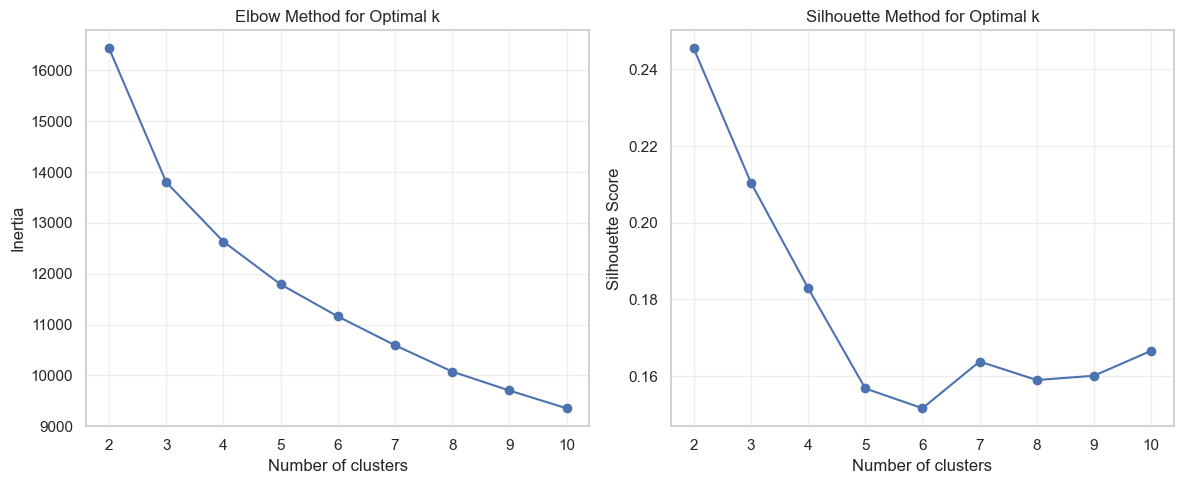

Number of clusters vs Inertia:
k=2: 16433.07
k=3: 13798.17
k=4: 12630.42
k=5: 11789.80
k=6: 11160.48
k=7: 10592.78
k=8: 10075.04
k=9: 9702.41
k=10: 9353.03

Number of clusters vs Silhouette Score:
k=2: 0.245
k=3: 0.210
k=4: 0.183
k=5: 0.157
k=6: 0.152
k=7: 0.164
k=8: 0.159
k=9: 0.160
k=10: 0.167

Cluster sizes:
cluster
0    356
1    514
2    297
3    443
Name: count, dtype: int64

Cluster centroids:
   acousticness  danceability  energy  instrumentalness  liveness  valence  \
0         0.256         0.623   0.681             0.190     0.224    0.783   
1         0.192         0.361   0.929             0.165     0.895    0.437   
2         0.483         0.449   0.561             0.081     0.326    0.391   
3         0.158         0.484   0.879             0.199     0.350    0.717   

   loudness  speechiness   tempo  is_live  acoustic_index  energy_index  \
0    -9.263        0.046 115.311    0.025           0.628         0.316   
1    -5.471        0.108 134.417    0.850           0.48

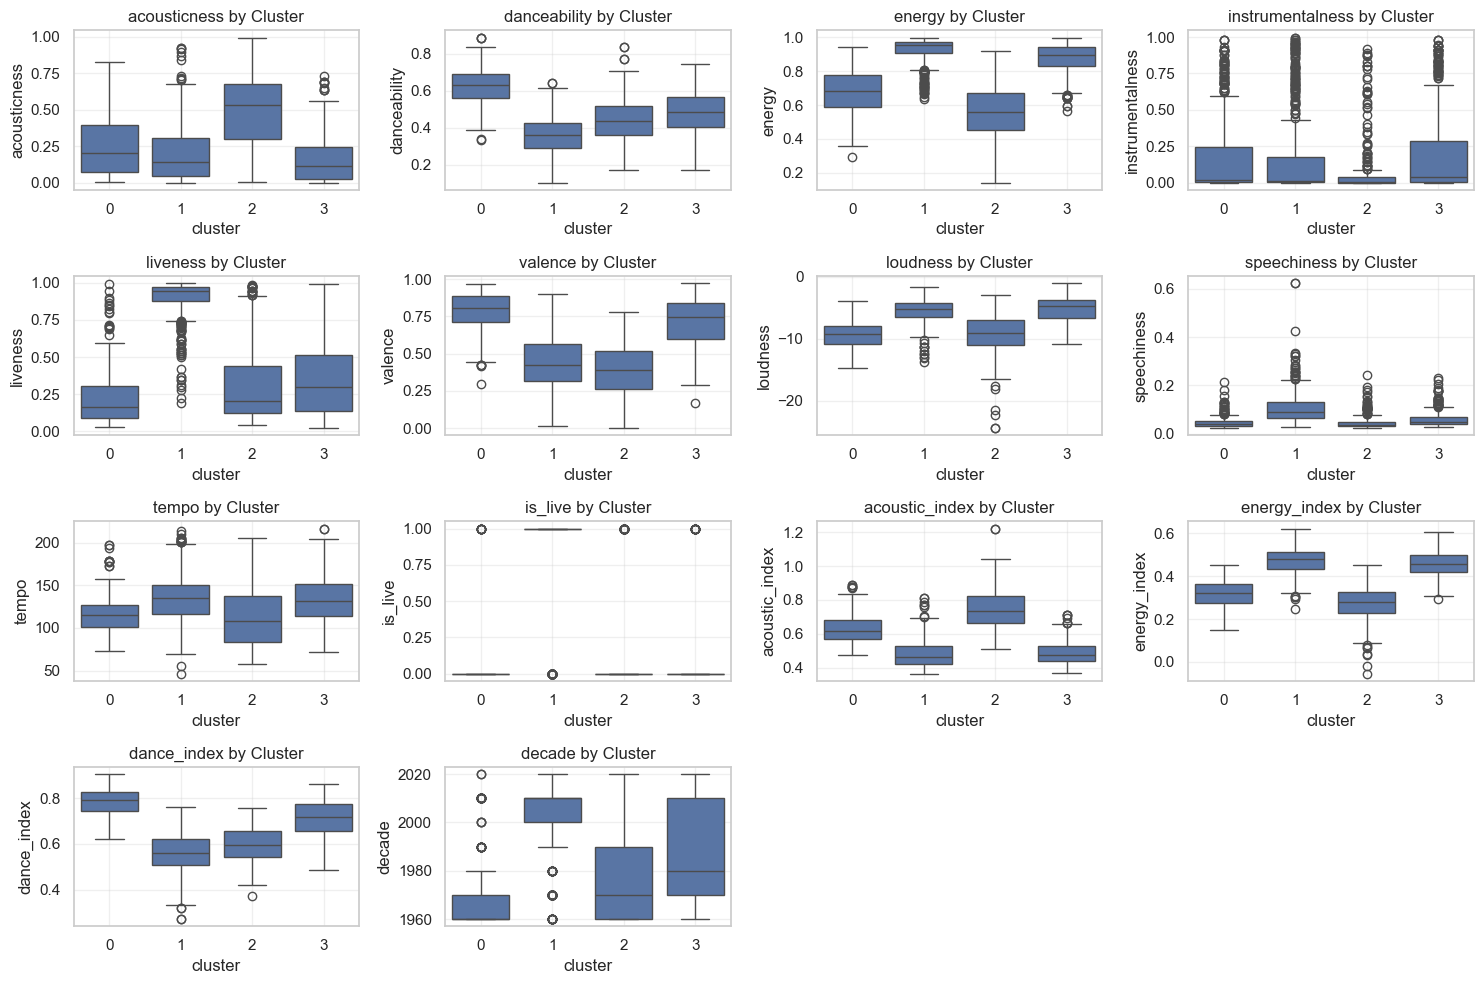

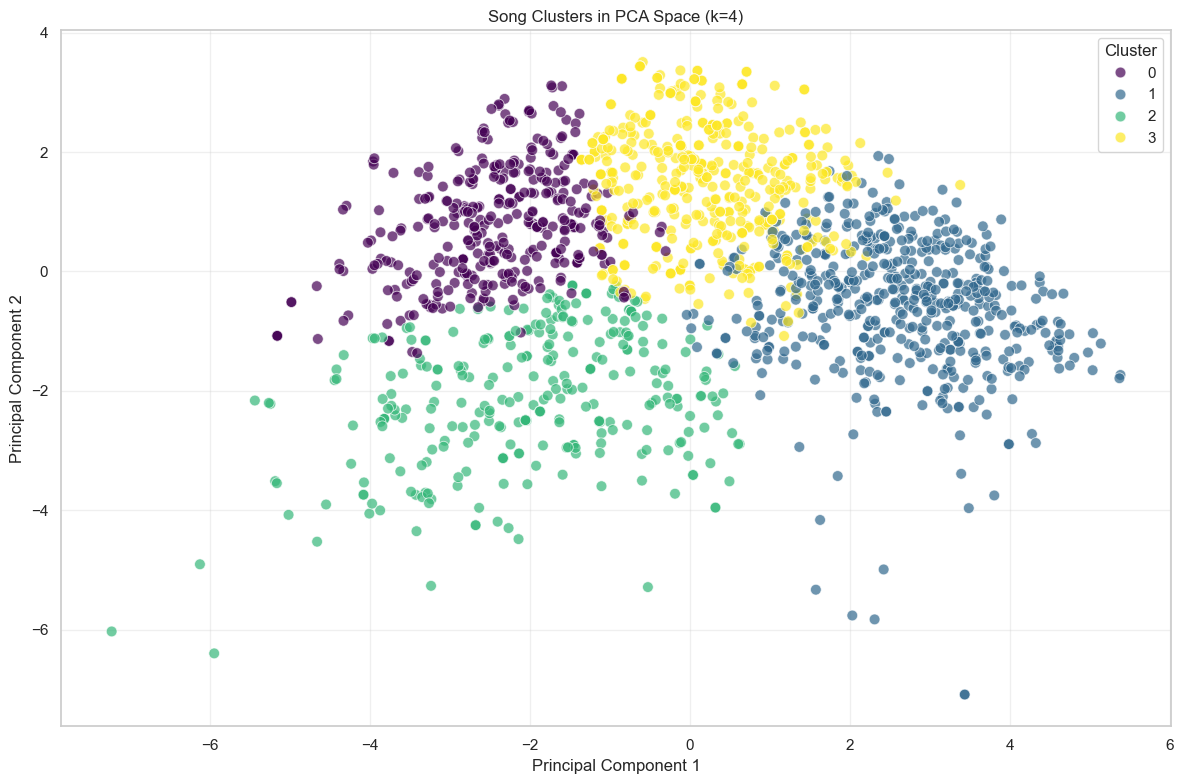

<Figure size 1200x600 with 0 Axes>

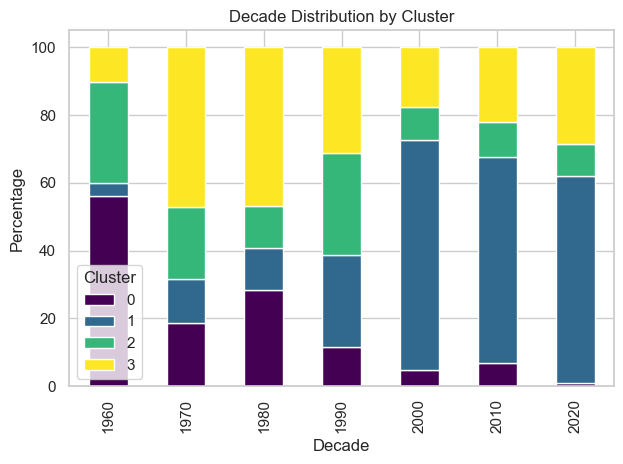


Most representative songs for each cluster:

Cluster 0:
                    name                                  album  popularity  \
992         Hand Of Fate                         Black And Blue          21   
1464  Blue Turns To Grey  December's Children (and everybody's)           2   
1018    Fingerprint File                It's Only Rock 'N' Roll          27   
1452  Blue Turns To Grey  December’s Children (And Everybody’s)          25   
1456  You Better Move On  December's Children (and everybody's)           2   

      is_live  release_year  
992         0          1976  
1464        0          1965  
1018        0          1974  
1452        0          1965  
1456        0          1965  

Cluster 1:
                        name                           album  popularity  \
460  Midnight Rambler - Live              Havana Moon (Live)          22   
306       Brown Sugar - Live      Voodoo Lounge Uncut (Live)          13   
334       Brown Sugar - Live      Voodoo Lounge 

In [17]:
# Cluster Analysis for Rolling Stones Song Cohorts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Feature Selection for Clustering
# Select the most relevant features based on our EDA and feature engineering
cluster_features = [
    # Audio features
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'valence', 'loudness', 'speechiness', 'tempo',
    # Key engineered features
    'is_live', 'acoustic_index', 'energy_index', 'dance_index',
    'decade'  # Temporal component
]

# Create dataset for clustering
X = df_clean[cluster_features].copy()

# Convert decade to numeric if it's categorical
if not pd.api.types.is_numeric_dtype(X['decade']):
    X['decade'] = X['decade'].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Determine the optimal number of clusters
# Using multiple methods for validation

# Method 1: Elbow Method with Inertia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

# Method 2: Silhouette Score
plt.subplot(1, 2, 2)
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_range, silhouette_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('optimal_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# Print numeric results to help decide
print("Number of clusters vs Inertia:")
for k, i in zip(K_range, inertia):
    print(f"k={k}: {i:.2f}")

print("\nNumber of clusters vs Silhouette Score:")
for k, s in zip(K_range, silhouette_scores):
    print(f"k={k}: {s:.3f}")

# 3. Apply K-means clustering with the optimal k
# This will be determined after reviewing the plots, but let's assume it's 4 for now
optimal_k = 4  # Update this based on the elbow/silhouette results

# Apply final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# 4. Analyze the clusters
# Cluster sizes
cluster_sizes = df_clean['cluster'].value_counts().sort_index()
print("\nCluster sizes:")
print(cluster_sizes)

# Calculate cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                        columns=cluster_features)
print("\nCluster centroids:")
print(centroids)

# 5. Visualize cluster characteristics
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cluster_features, 1):
    if i <= 16:  # Limit to 16 plots to avoid overcrowding
        plt.subplot(4, 4, i)
        sns.boxplot(x='cluster', y=feature, data=df_clean)
        plt.title(f'{feature} by Cluster')
        plt.ylabel(feature)
        plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Visualize clusters in PCA space
# Apply PCA 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame with principal components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_clean['cluster']

# Plot clusters in PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=60, alpha=0.7)
plt.title(f'Song Clusters in PCA Space (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('cluster_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Analyzing era distribution within clusters
plt.figure(figsize=(12, 6))
decade_cluster = pd.crosstab(df_clean['decade'], df_clean['cluster'])
decade_cluster_pct = decade_cluster.div(decade_cluster.sum(axis=1), axis=0) * 100

decade_cluster_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Decade Distribution by Cluster')
plt.xlabel('Decade')
plt.ylabel('Percentage')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('decade_cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Find representative songs for each cluster
# Calculate distance from each point to its cluster centroid
distances = []
for i, row in enumerate(X_scaled):
    cluster_id = df_clean.iloc[i]['cluster']
    center = kmeans.cluster_centers_[cluster_id]
    dist = np.linalg.norm(row - center)
    distances.append(dist)

df_clean['centroid_distance'] = distances

# Find most representative songs (closest to centroids)
print("\nMost representative songs for each cluster:")
for cluster_id in range(optimal_k):
    cluster_songs = df_clean[df_clean['cluster'] == cluster_id]
    representative_songs = cluster_songs.sort_values('centroid_distance').head(5)
    print(f"\nCluster {cluster_id}:")
    print(representative_songs[['name', 'album', 'popularity', 'is_live', 'release_year']])

# 9. Describe clusters based on features
# For each cluster, identify key distinguishing features
print("\nCluster descriptions:")
for cluster_id in range(optimal_k):
    cluster_df = df_clean[df_clean['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} ({len(cluster_df)} songs):")
    
    # Calculate feature means for this cluster
    means = cluster_df[cluster_features].mean()
    
    # Compare to overall means
    overall_means = df_clean[cluster_features].mean()
    differences = means - overall_means
    pct_diff = (means / overall_means - 1) * 100
    
    # Find top distinctive features (furthest from overall mean)
    distinctive = abs(pct_diff).sort_values(ascending=False).head(5)
    
    for feature in distinctive.index:
        value = means[feature]
        diff = pct_diff[feature]
        direction = "higher" if diff > 0 else "lower"
        print(f"- {feature}: {value:.3f} ({abs(diff):.1f}% {direction} than average)")
    
    # Most common decade
    top_decade = cluster_df['decade'].value_counts().idxmax()
    decade_pct = cluster_df['decade'].value_counts(normalize=True)[top_decade] * 100
    print(f"- Most common decade: {top_decade}s ({decade_pct:.1f}%)")
    
    # Live percentage
    live_pct = cluster_df['is_live'].mean() * 100
    print(f"- Live recordings: {live_pct:.1f}%")
    
    # Popularity
    avg_pop = cluster_df['popularity'].mean()
    print(f"- Average popularity: {avg_pop:.1f}")

In [18]:
# Additional feature engineering

# 1. Create standardized features for clustering
features_for_clustering = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'speechiness', 'valence', 'tempo', 'loudness']
df_scaled = df_clean.copy()
scaler = StandardScaler()
df_scaled[features_for_clustering] = scaler.fit_transform(df_clean[features_for_clustering])

# 2. Create composite features
df_clean['energy_index'] = (df_clean['energy'] + df_clean['loudness']/30 + df_clean['tempo']/200)/3
df_clean['acoustic_index'] = (df_clean['acousticness'] + (1-df_clean['energy']) + (1-df_clean['loudness']/30))/3
df_clean['dance_index'] = (df_clean['danceability'] + df_clean['valence'] + (1-df_clean['speechiness']))/3

# 3. Create era feature (early, middle, late)
era_bins = [1960, 1970, 1990, 2020]
era_labels = ['early', 'middle', 'late']
df_clean['era'] = pd.cut(df_clean['decade'], bins=era_bins, labels=era_labels, right=False)

# 4. Song length category
df_clean['length_category'] = pd.cut(df_clean['duration_ms']/1000, 
                                    bins=[0, 180, 300, 1000], 
                                    labels=['short', 'medium', 'long'])

print("Additional features created:")
print(df_clean[['energy_index', 'acoustic_index', 'dance_index', 'era', 'length_category']].head())

Additional features created:
   energy_index  acoustic_index  dance_index  era length_category
0         0.384           0.507        0.461  NaN           short
1         0.487           0.544        0.523  NaN          medium
2         0.485           0.537        0.528  NaN          medium
3         0.488           0.589        0.441  NaN            long
4         0.484           0.534        0.472  NaN            long
